In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/Luis Arbio/Documents/data/Processed/reservas_hoteles_processed.csv")

In [3]:
df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### Información general del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.shape

(36275, 19)

In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### EDA

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Distribución de la variable objetivo (Reservas canceladas)

In [8]:
df.booking_status.value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [9]:
# Contar cuántas reservas hay por estado
booking_counts = df.booking_status.value_counts()

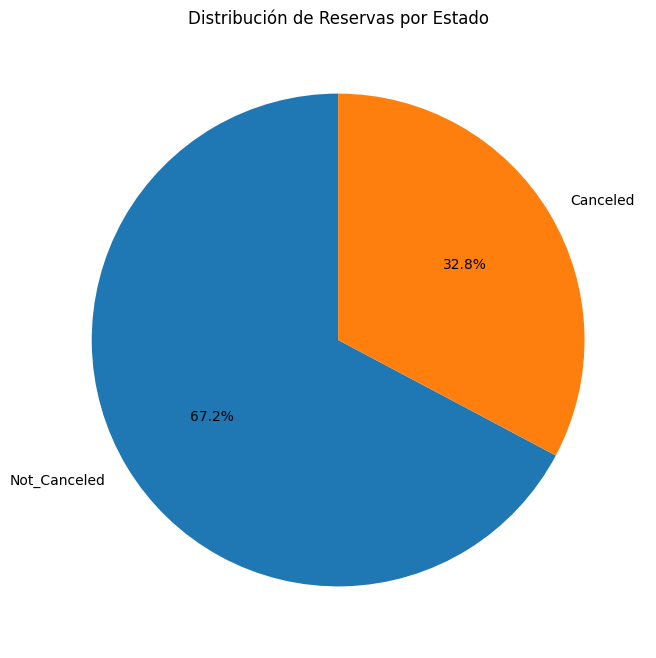

In [10]:
plt.figure(figsize=(8, 8))
# Graficar el gráfico de torta
plt.pie(
    booking_counts.values,                      # los valores numéricos
    labels=booking_counts.index,                # las etiquetas ("Canceled", "Not Canceled")
    autopct="%1.1f%%",                          # formato de porcentaje
    startangle=90,)                              # para comenzar el gráfico desde arriba
plt.title("Distribución de Reservas por Estado")
plt.show()


### Análisis de variables categóricas

In [11]:
object_columns = df.select_dtypes(include=["object", "string"]).columns
object_columns = object_columns.drop("Booking_ID") #eliminacion de Booking_ID
print("Columnas categóricas detectadas:", object_columns.tolist())

Columnas categóricas detectadas: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


### Distribución simple de cada variable categórica

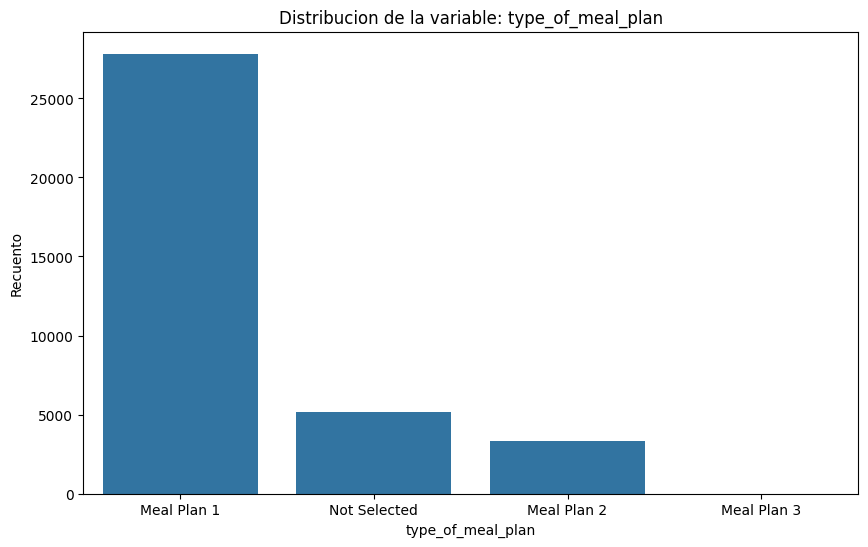

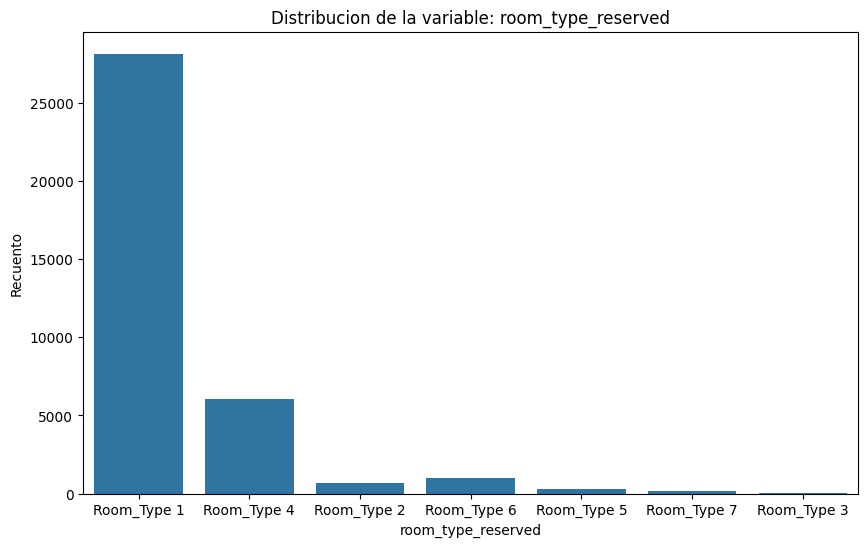

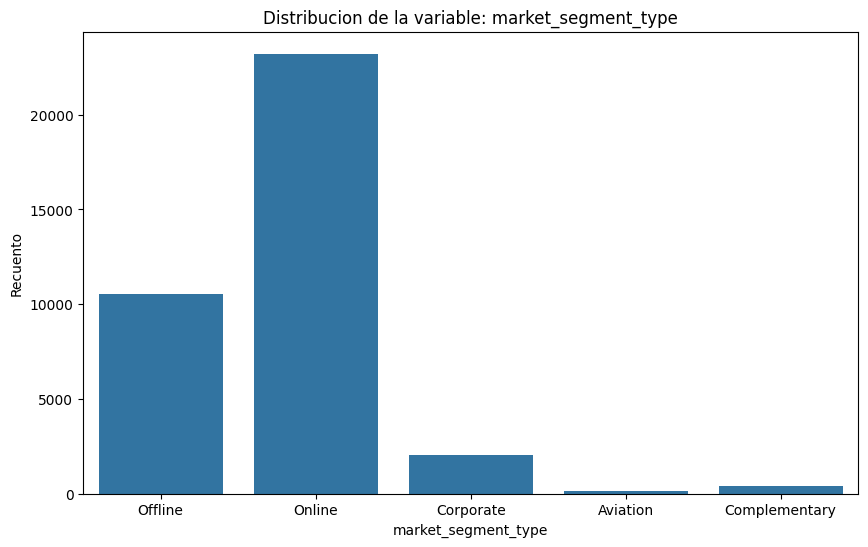

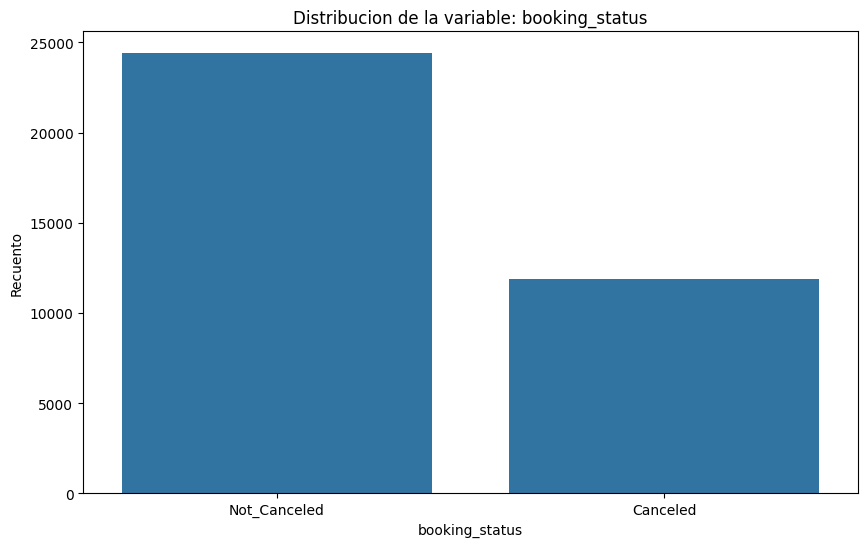

In [12]:
for column in object_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribucion de la variable: {column}")
    plt.xlabel(column)
    plt.ylabel("Recuento")
    plt.show()

### Distribución segmentada por estado de reserva

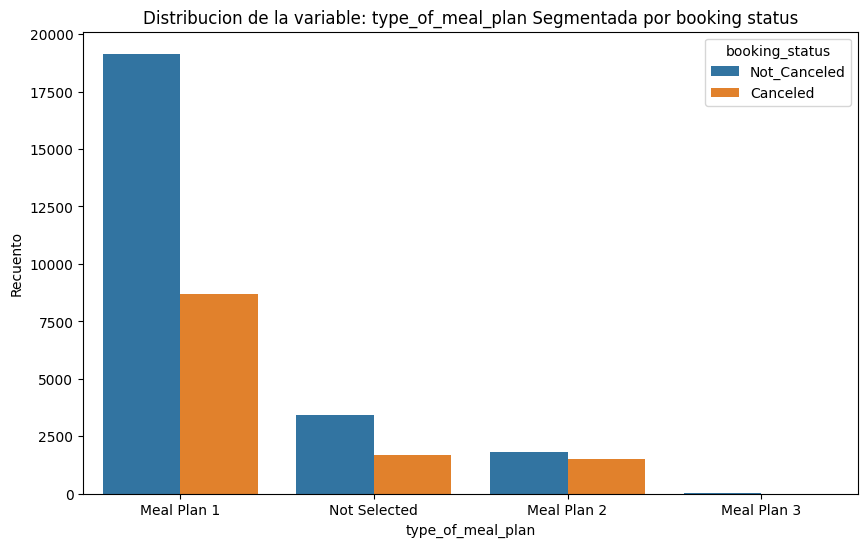

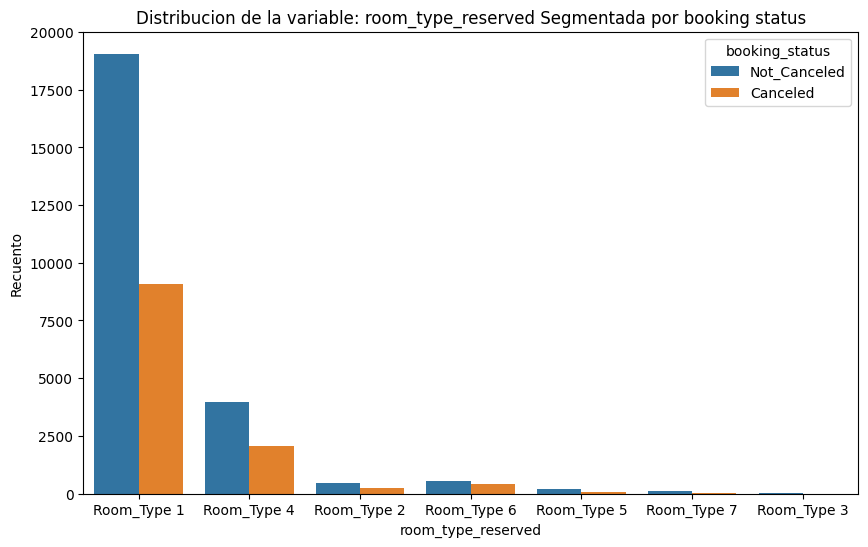

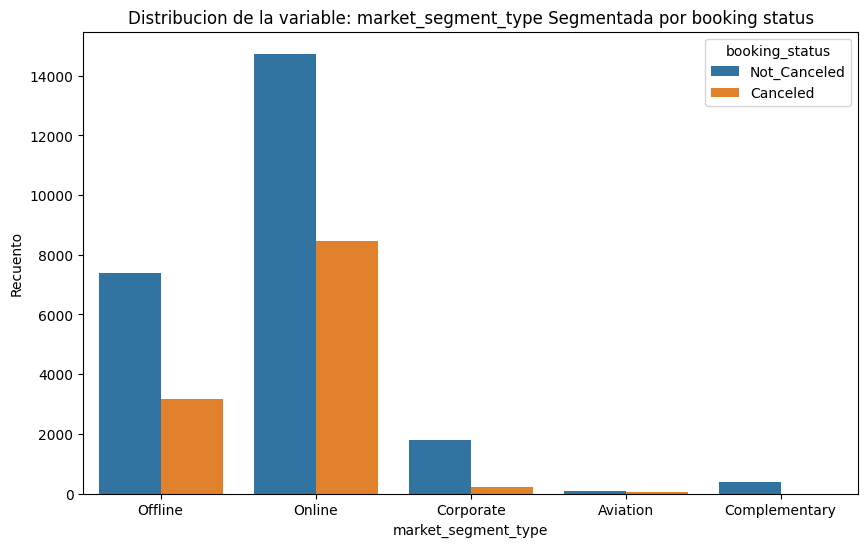

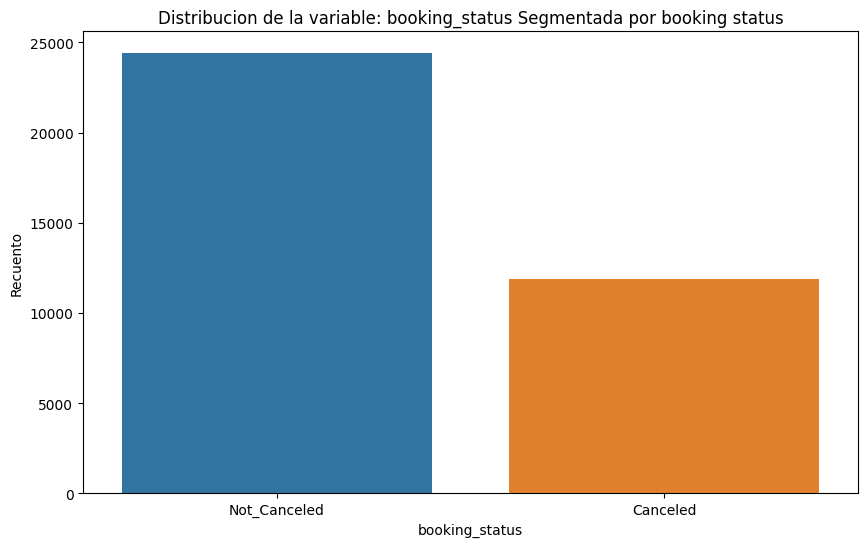

In [13]:
for column in object_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, hue="booking_status")
    plt.title(f"Distribucion de la variable: {column} Segmentada por booking status")
    plt.xlabel(column)
    plt.ylabel("Recuento")
    plt.show()

### Análisis de variables numéricas

In [14]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [15]:
numeric_columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

#### Histogramas

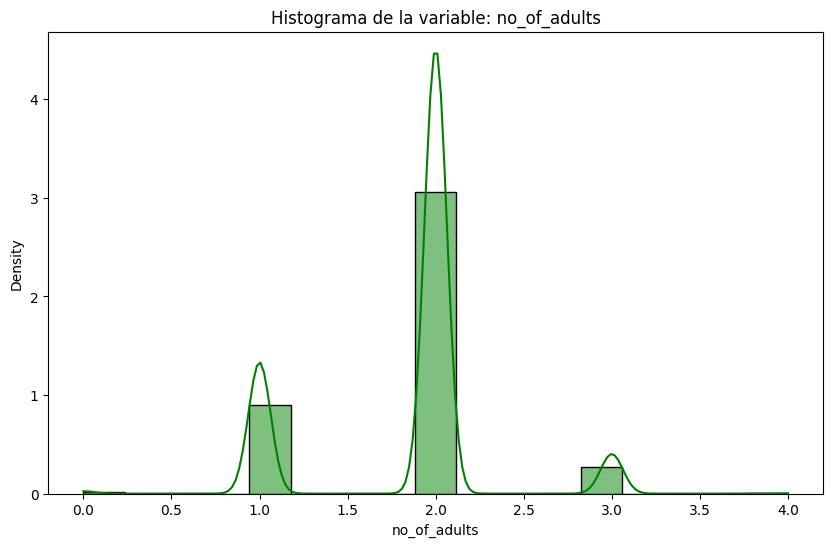

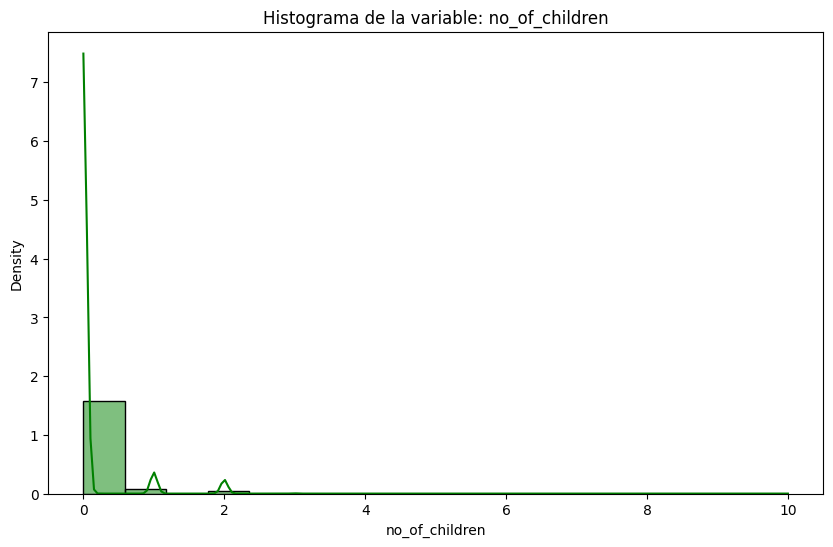

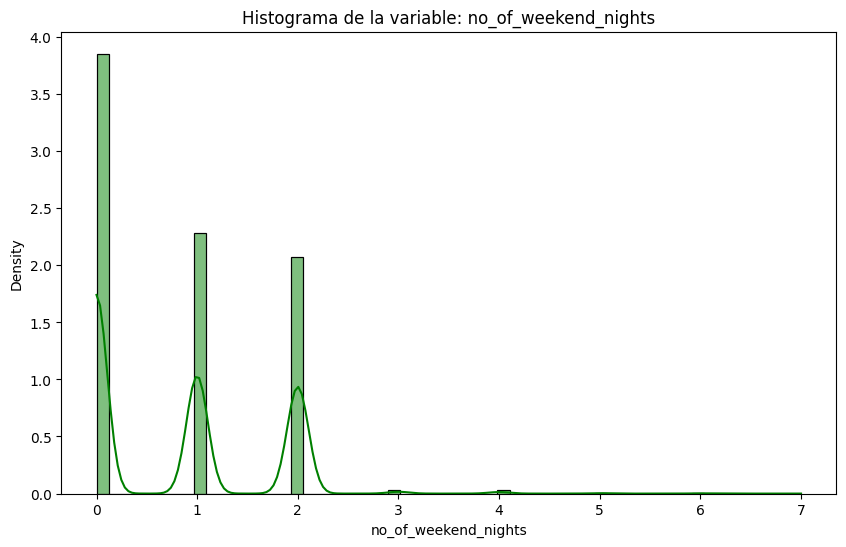

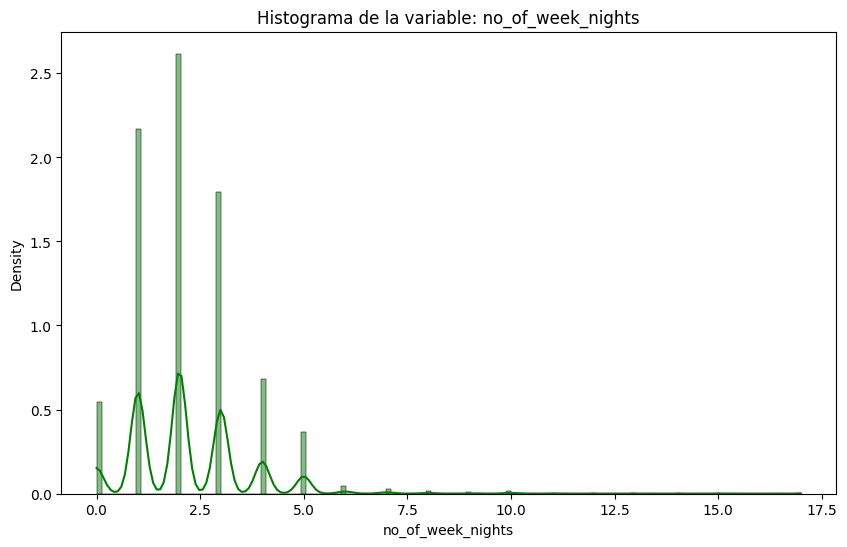

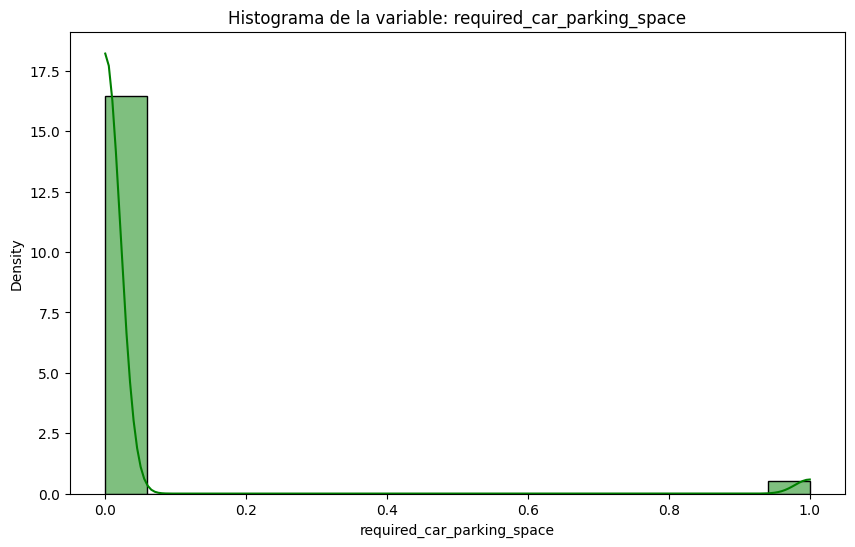

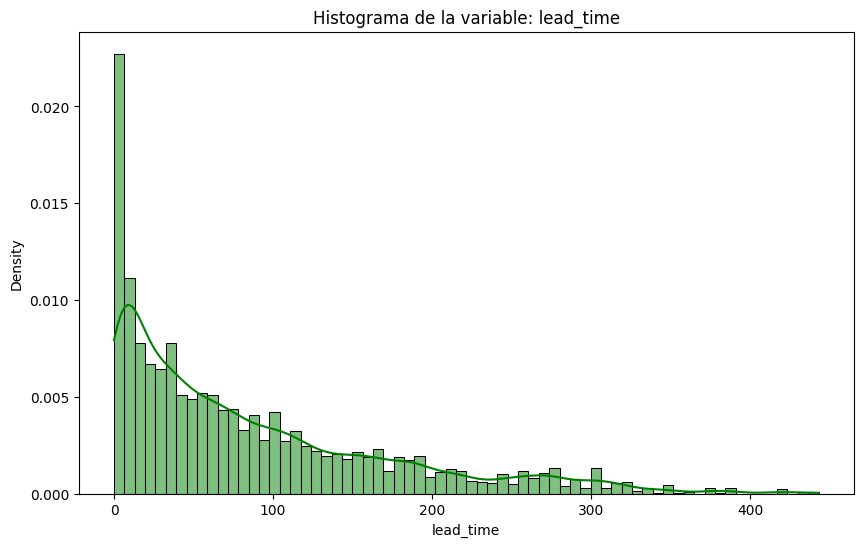

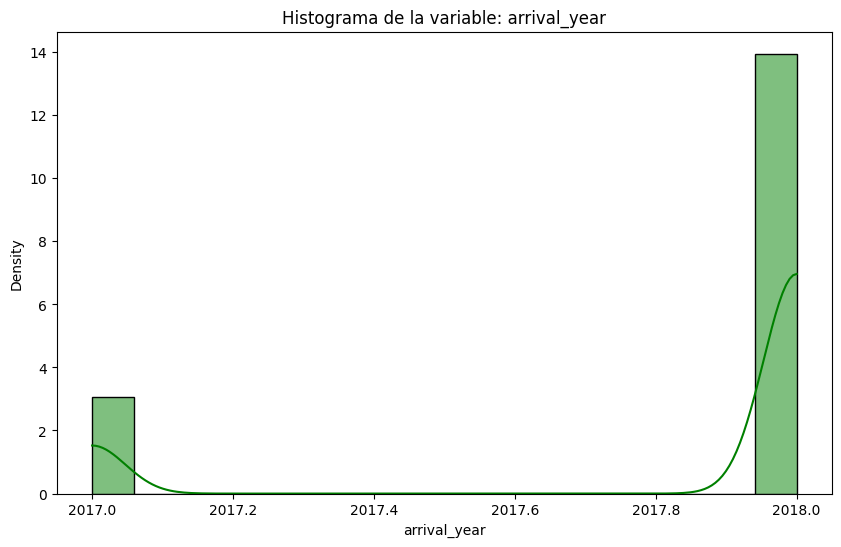

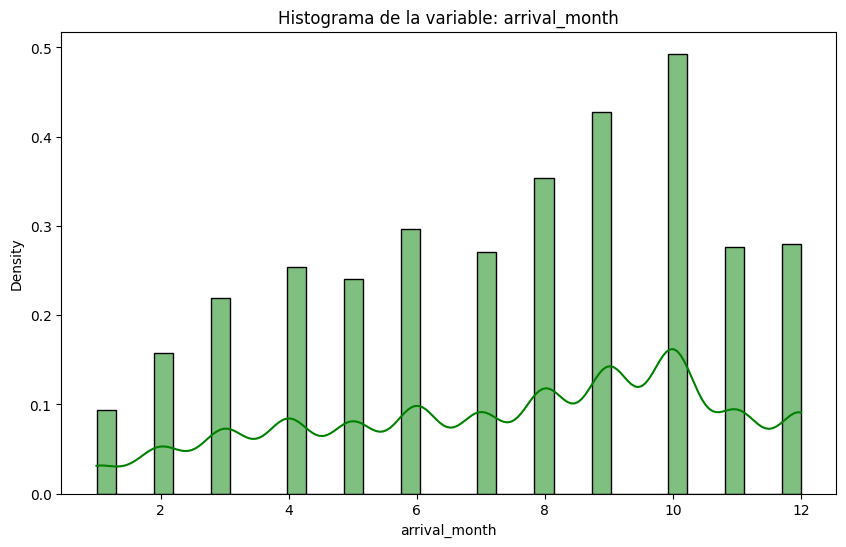

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, kde=True, stat="density", color="green")
    plt.title(f"Histograma de la variable: {column}")
    plt.show()

#### Boxplots

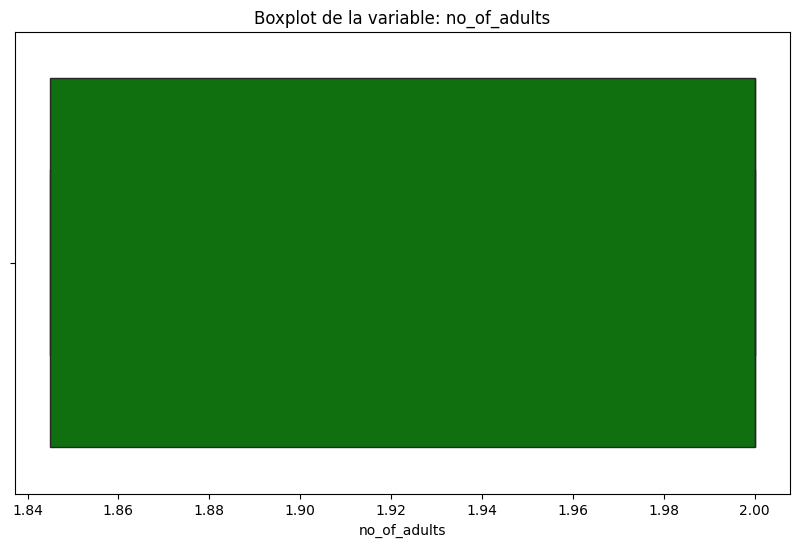

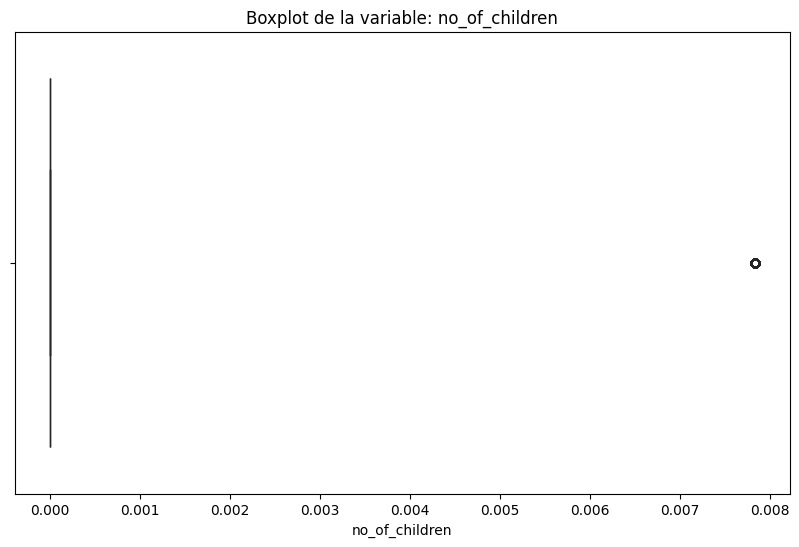

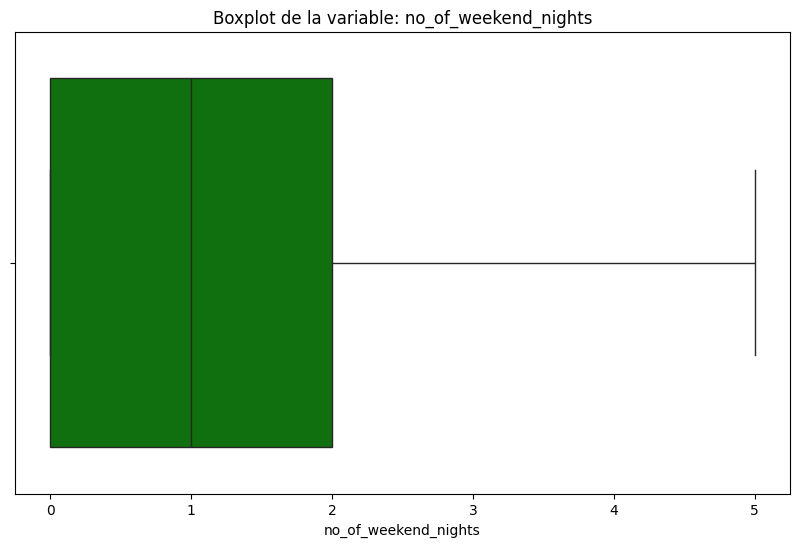

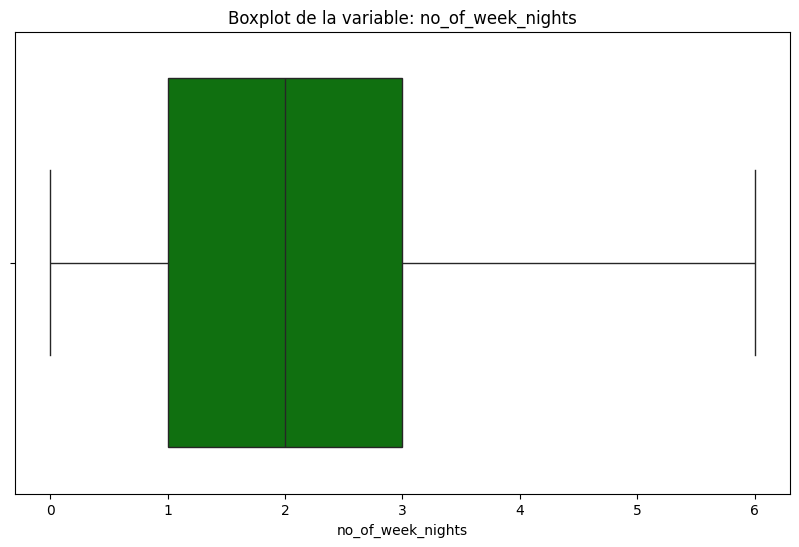

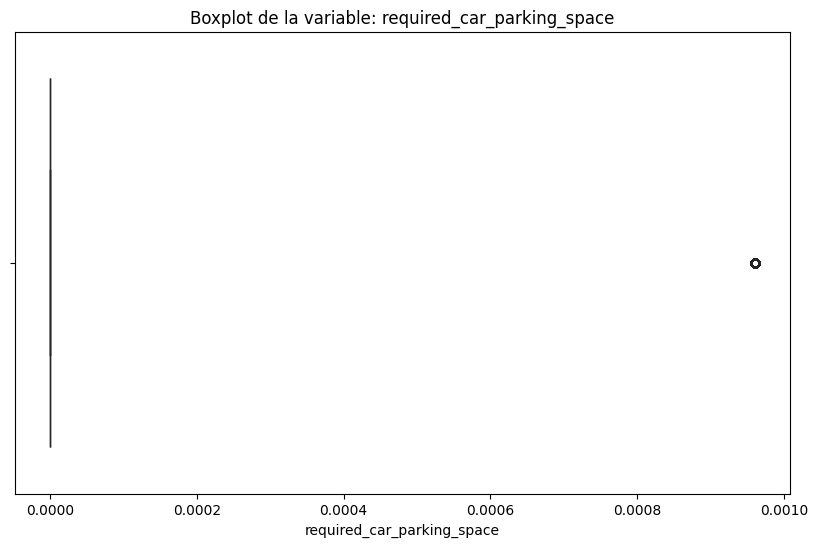

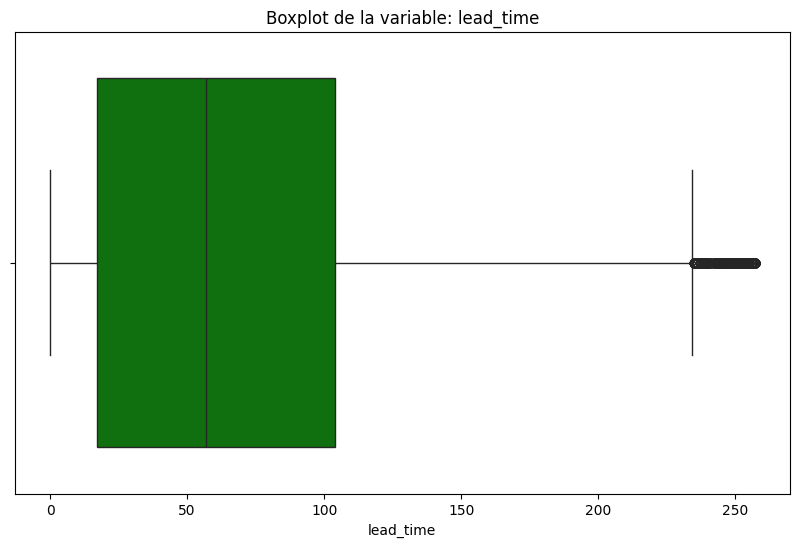

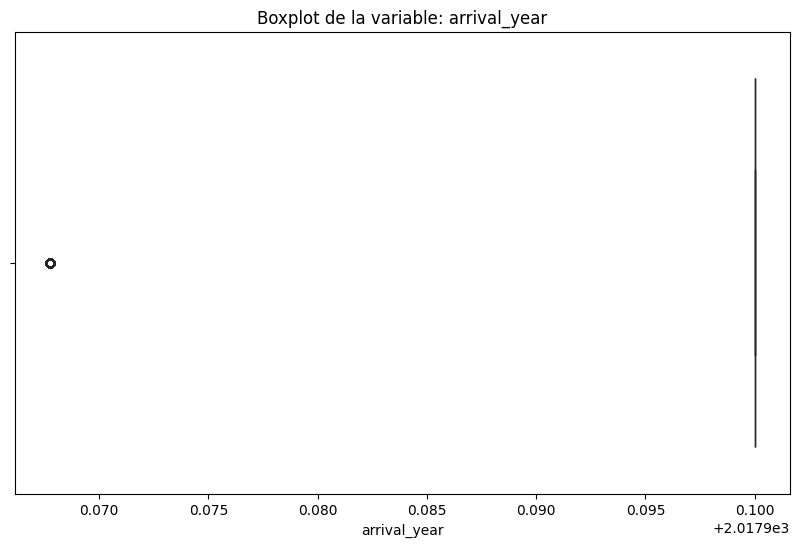

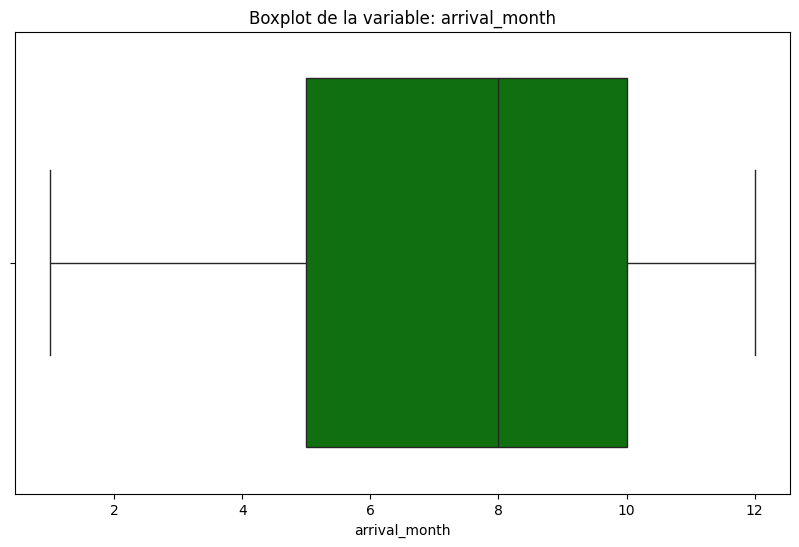

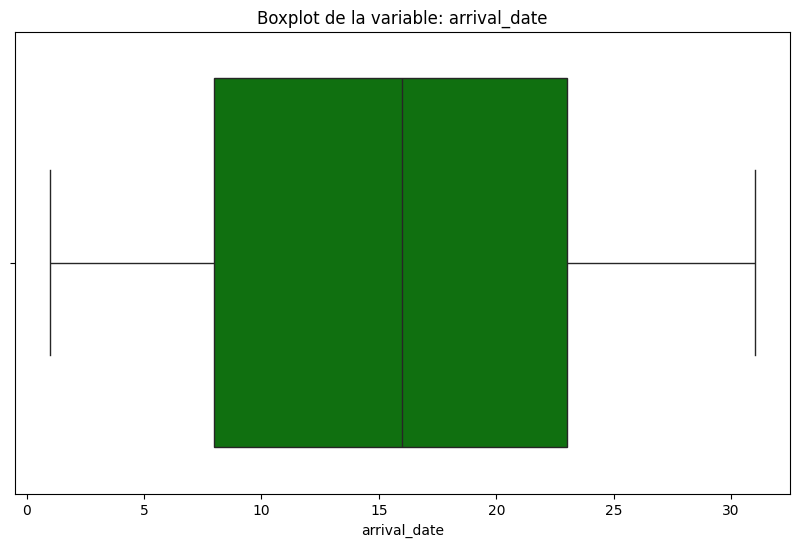

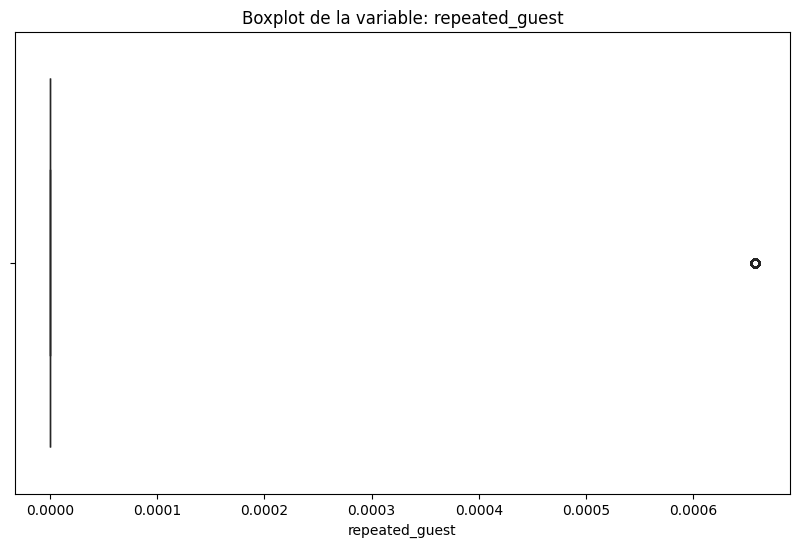

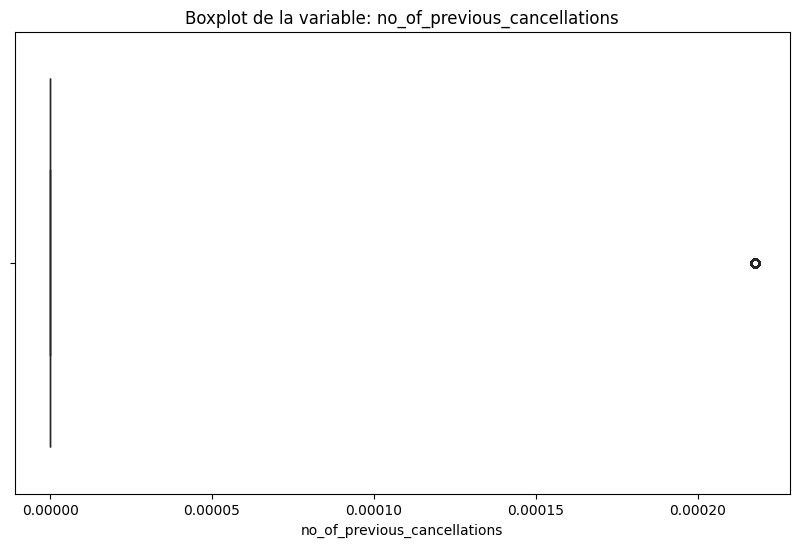

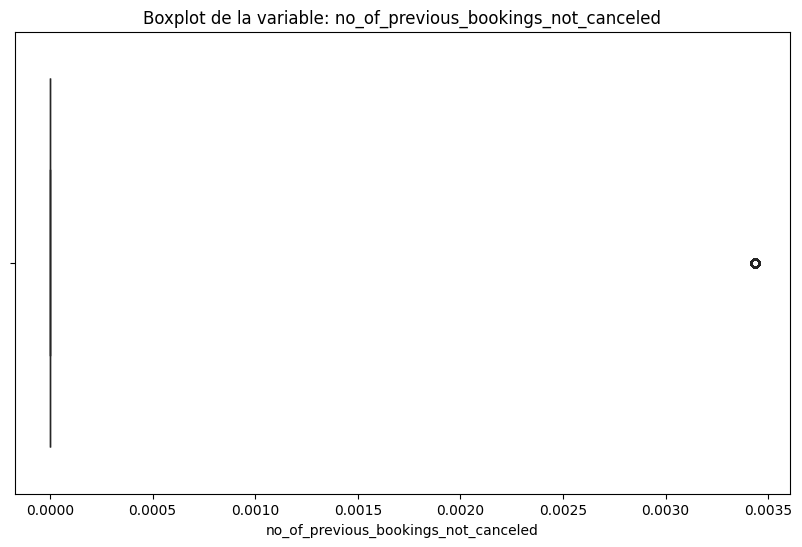

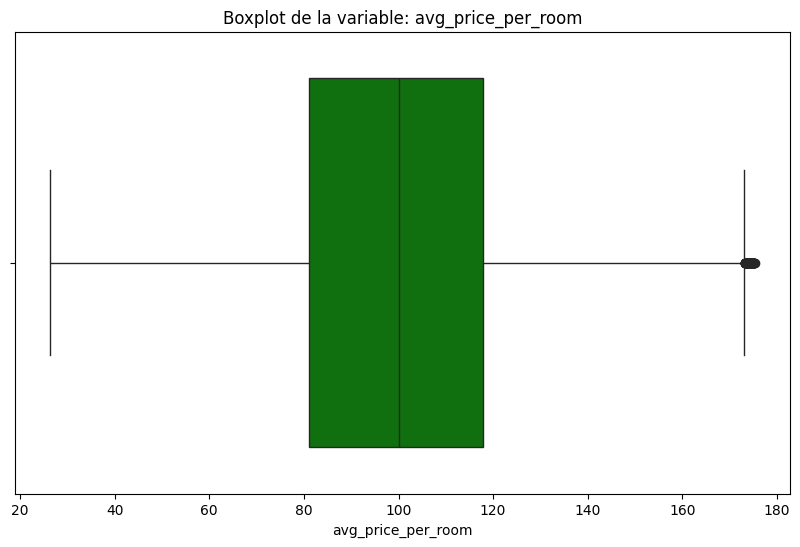

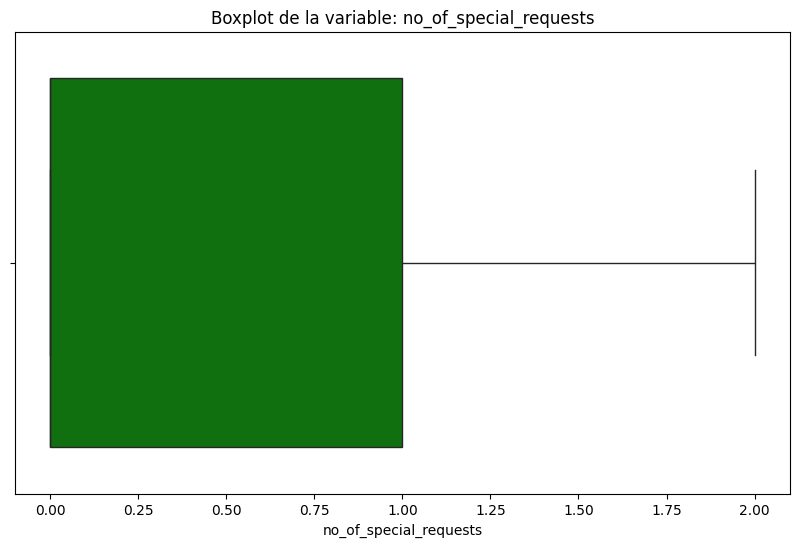

In [35]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=column, color="green")
    plt.title(f"Boxplot de la variable: {column}")
    plt.show()

In [ ]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    col_mean = df[col].mean()
    df.loc[(df[col] < lower) | (df[col] > upper), col] = col_mean
    

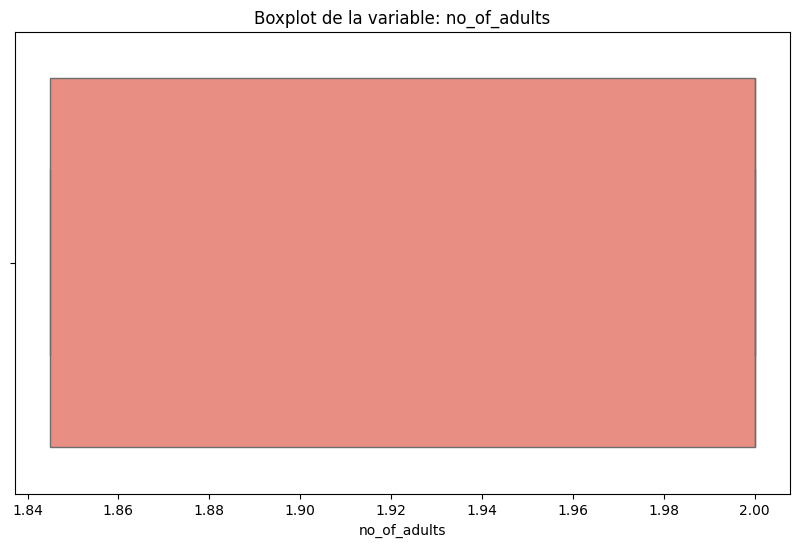

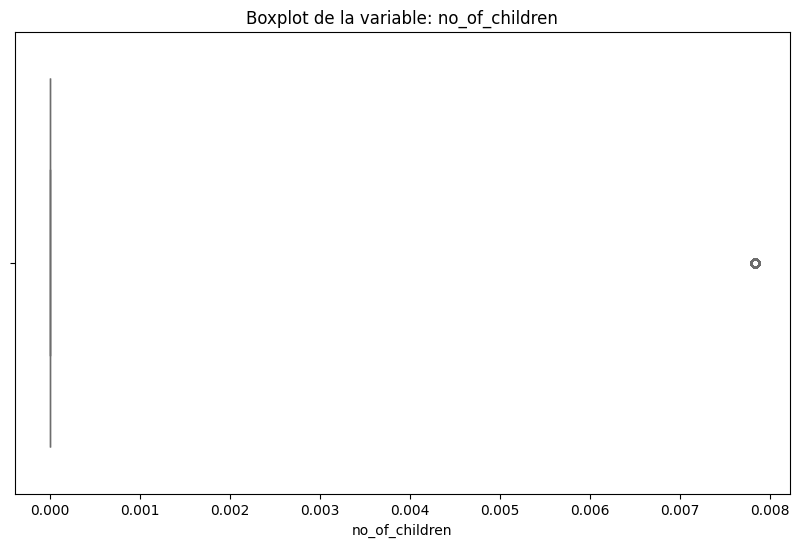

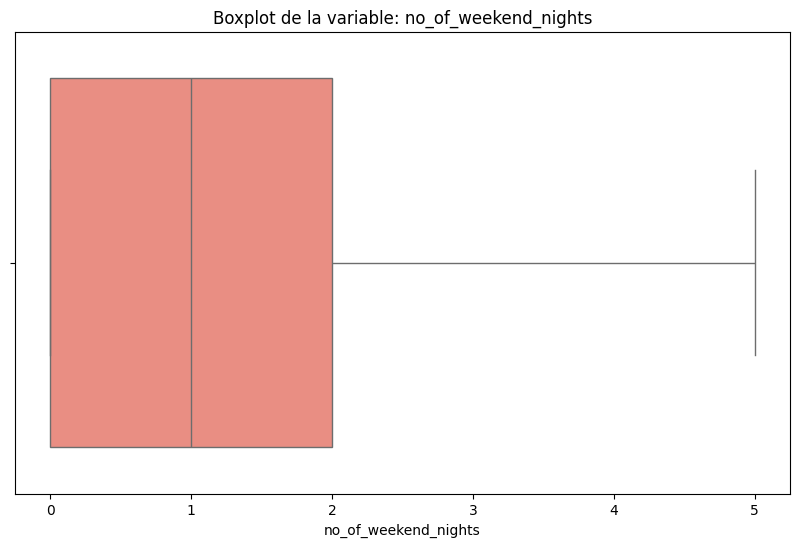

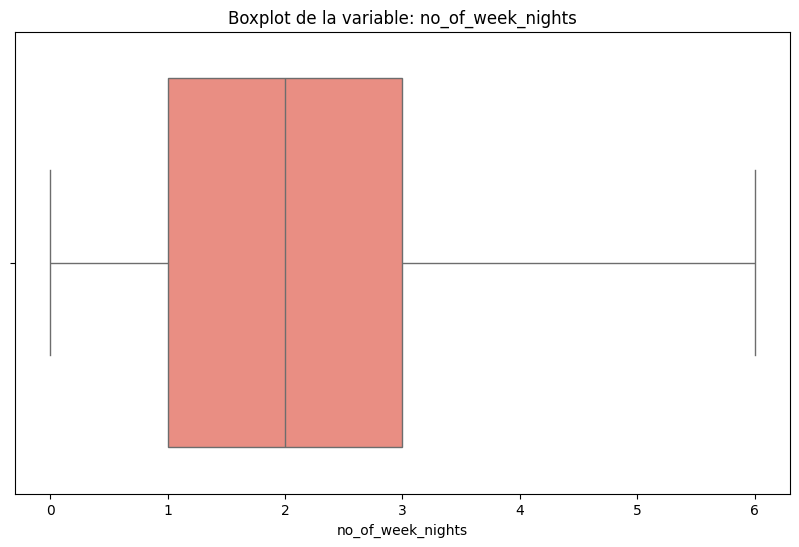

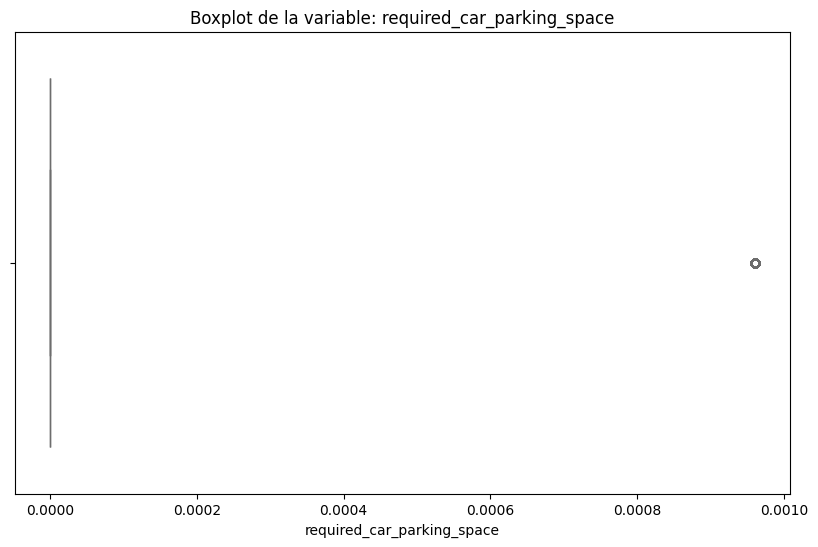

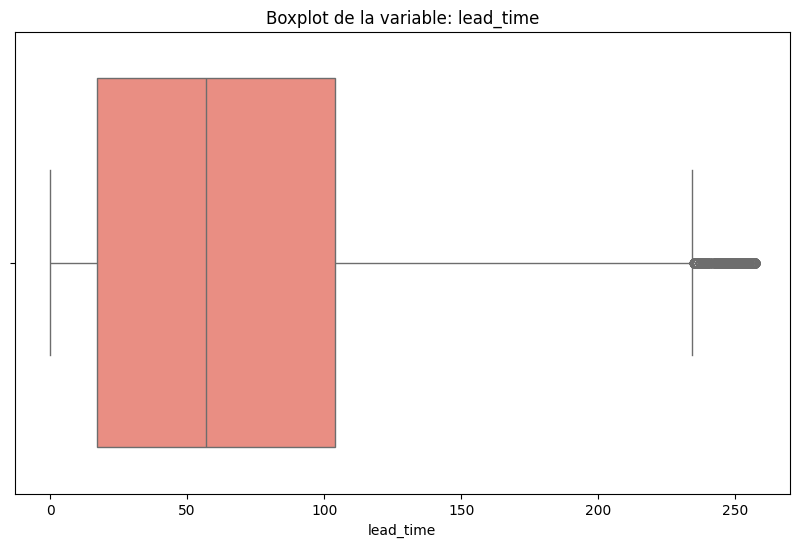

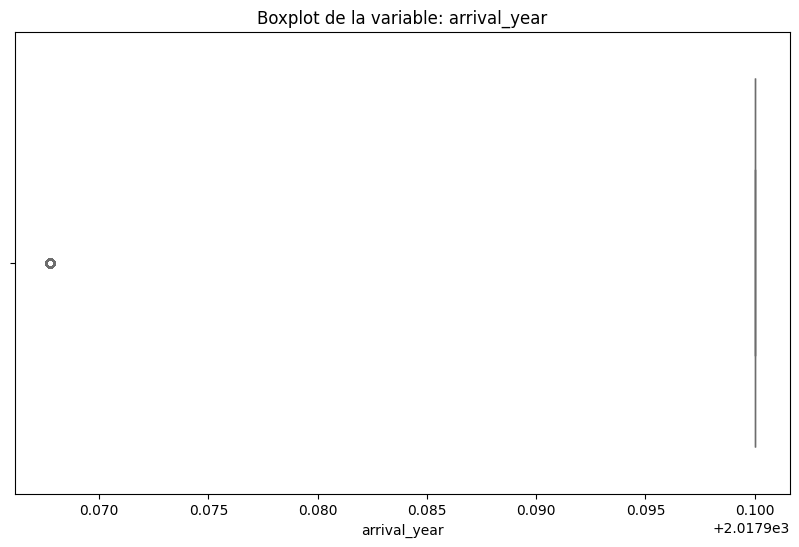

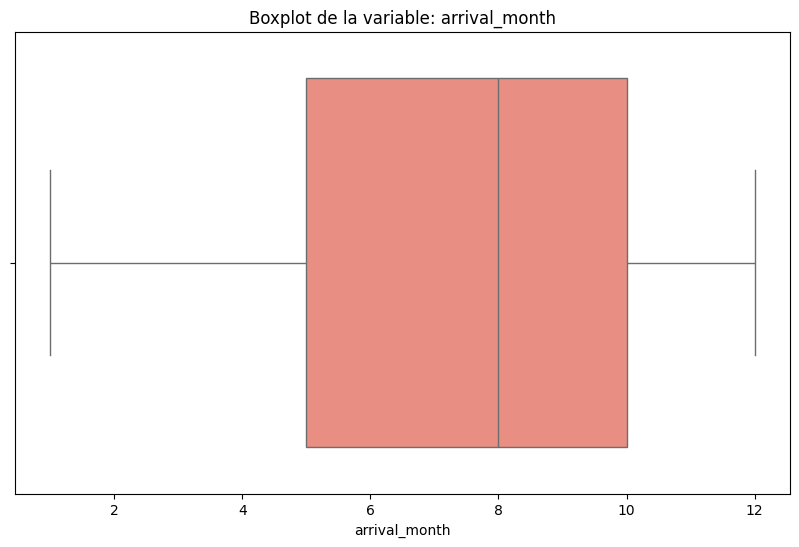

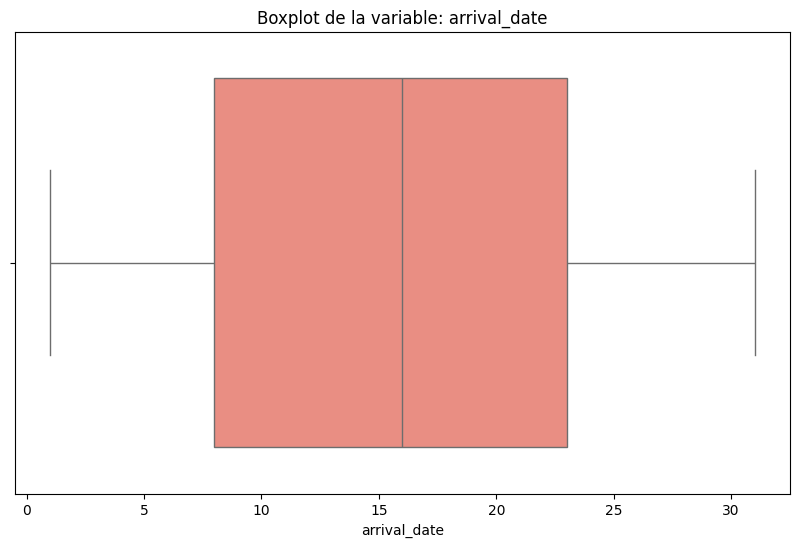

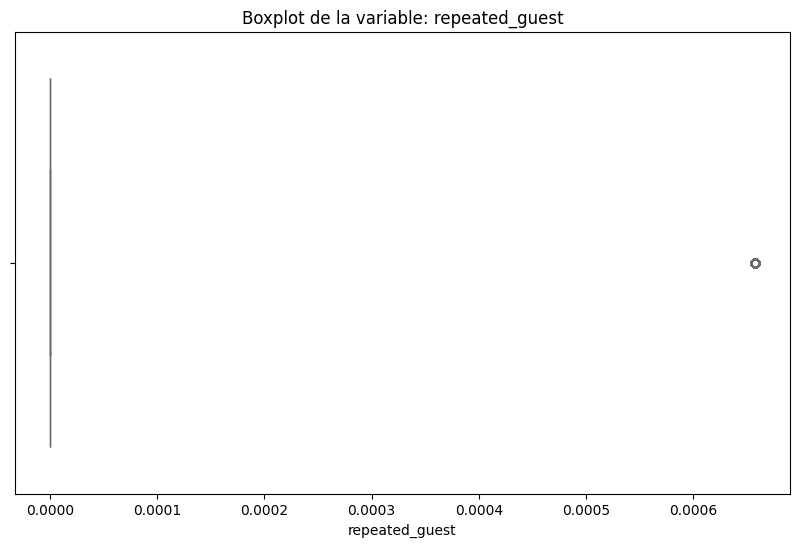

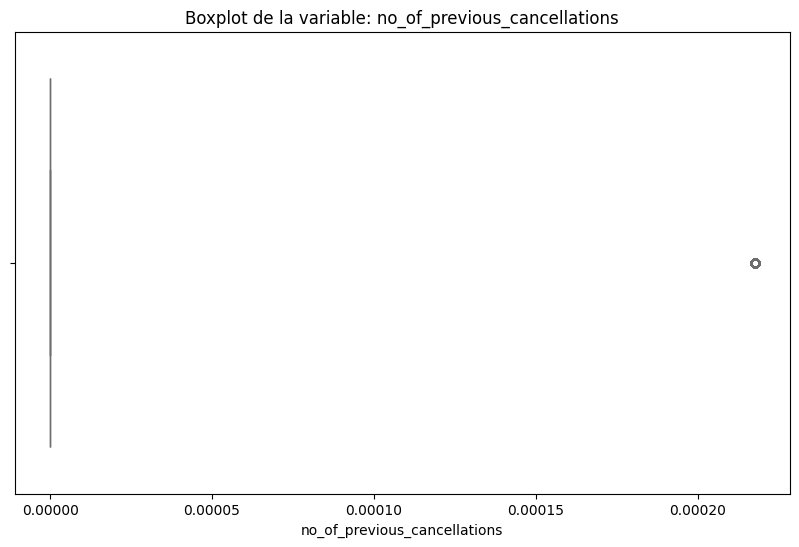

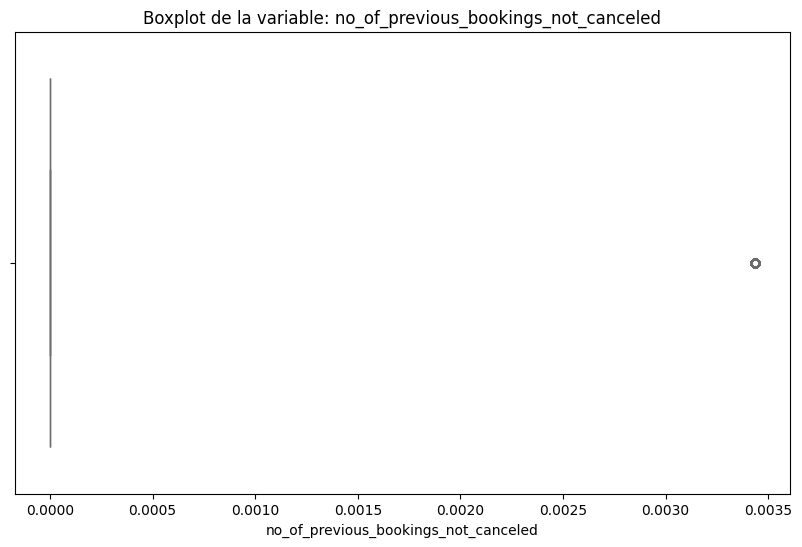

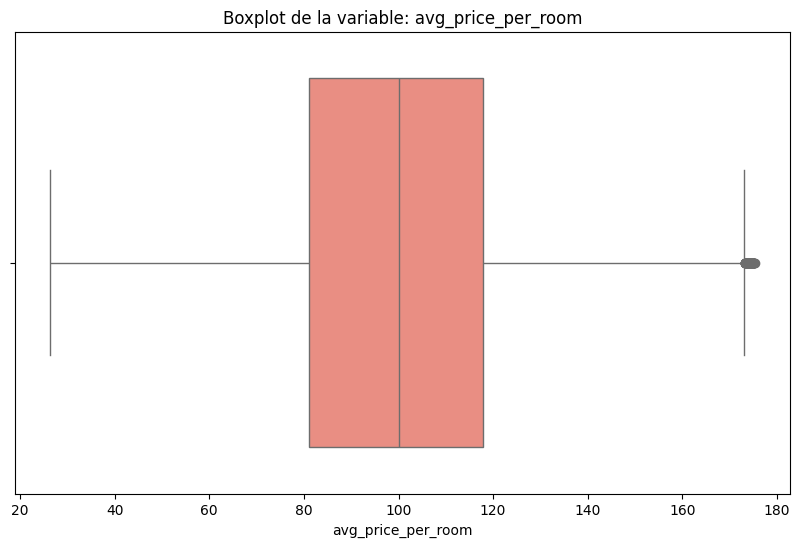

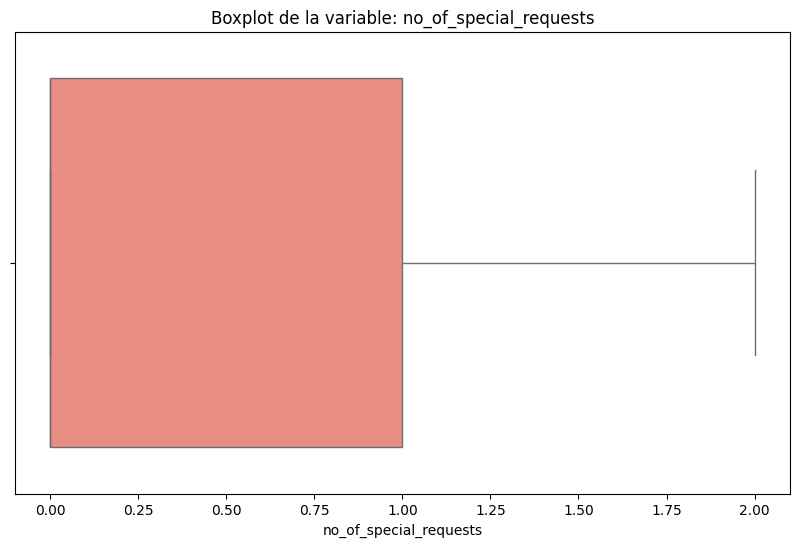

In [36]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=column, color="salmon")
    plt.title(f"Boxplot de la variable: {column}")
    plt.show()

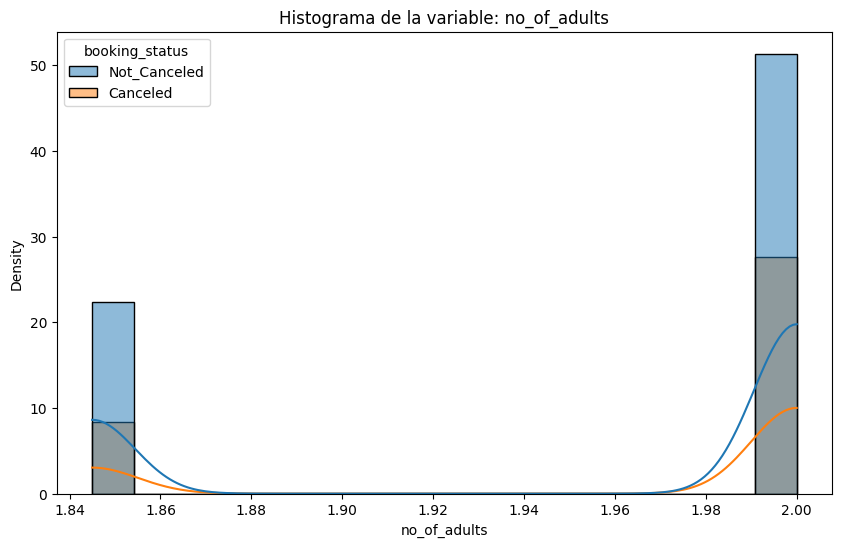

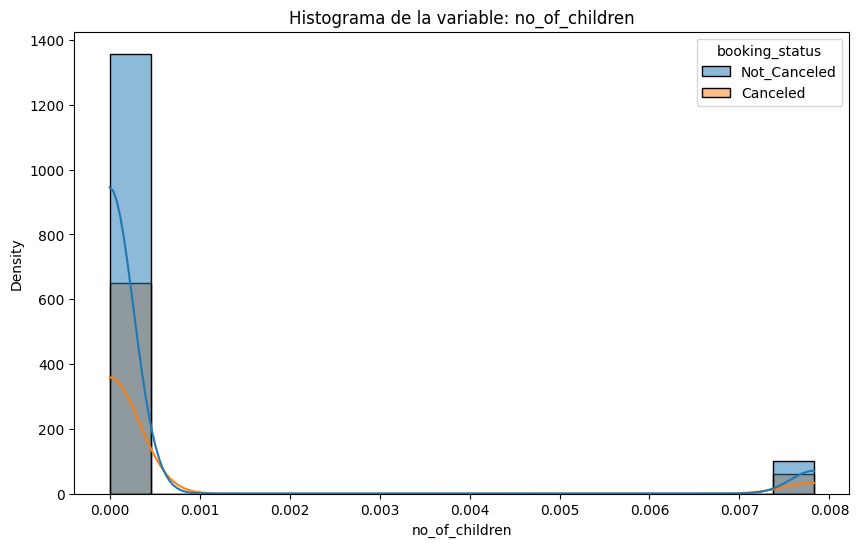

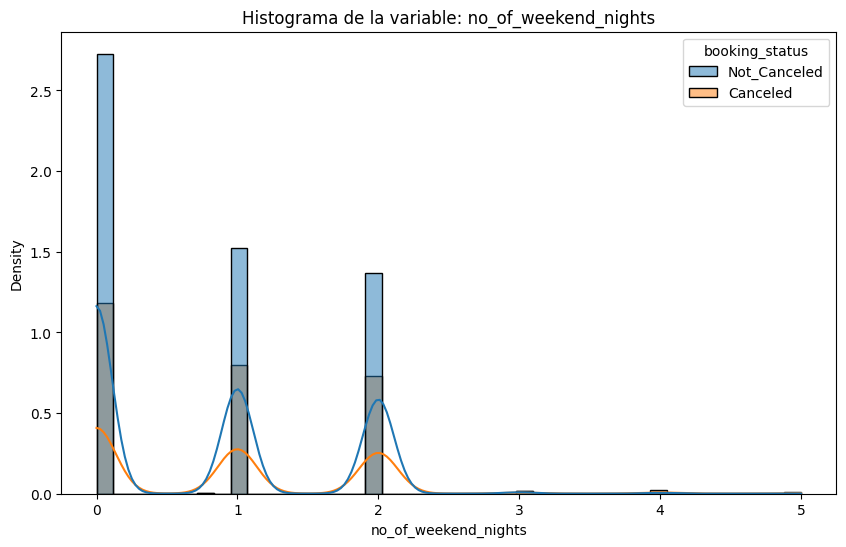

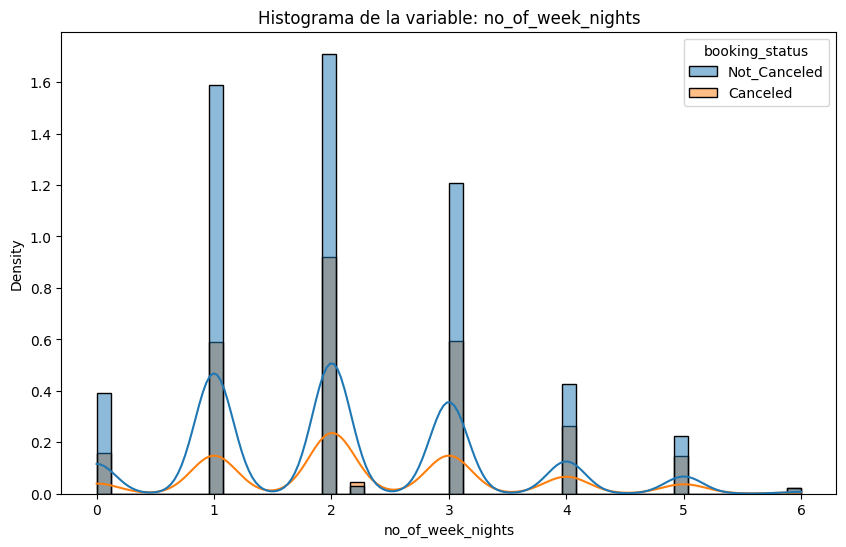

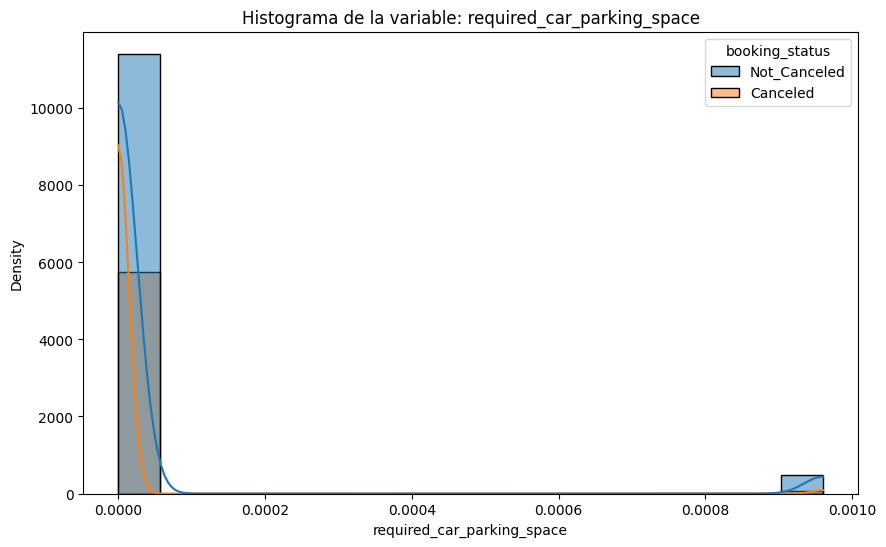

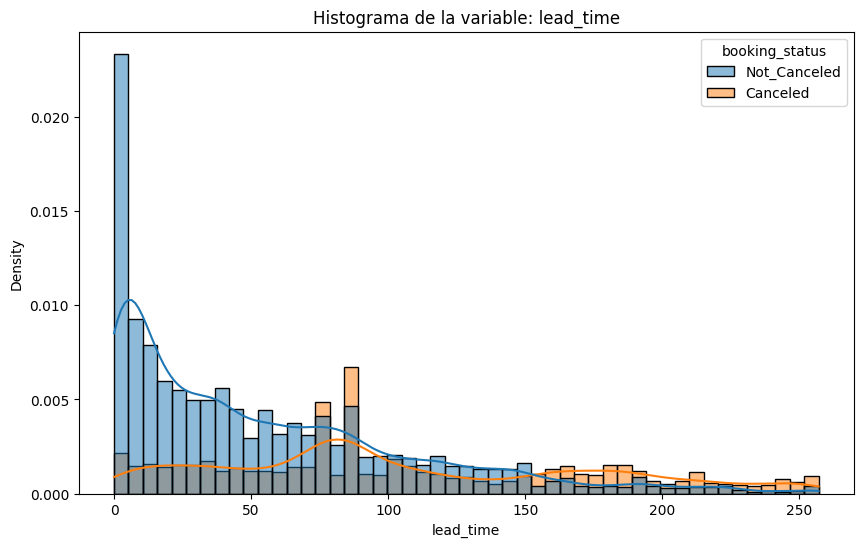

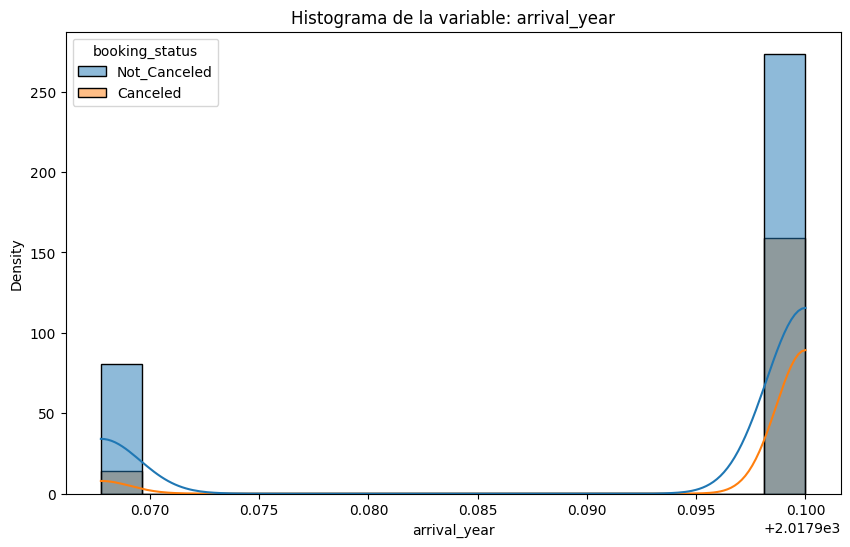

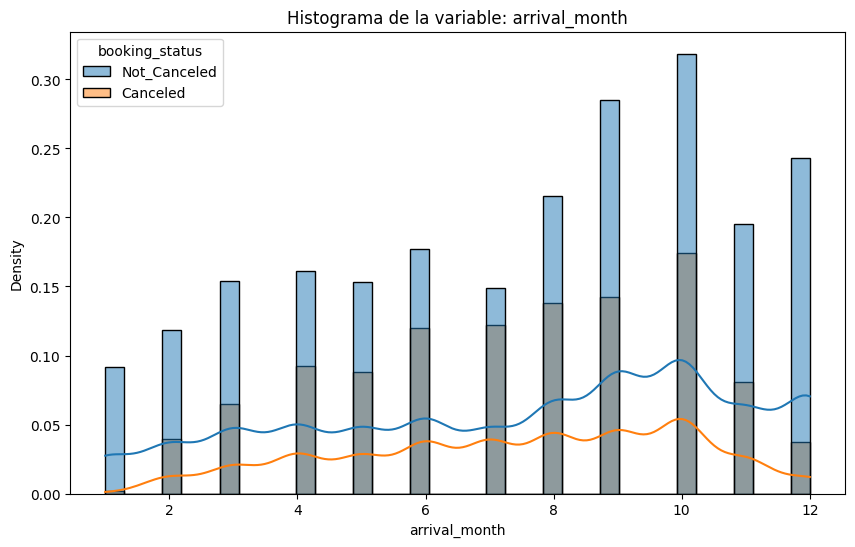

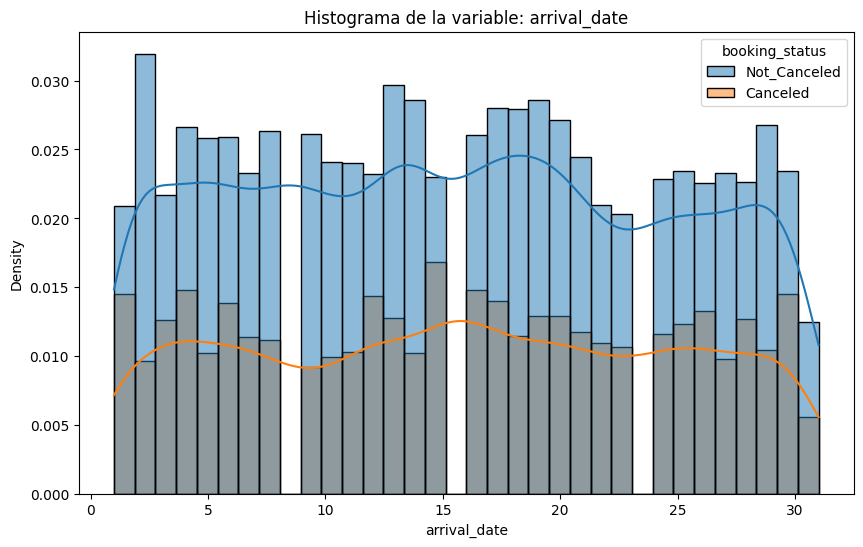

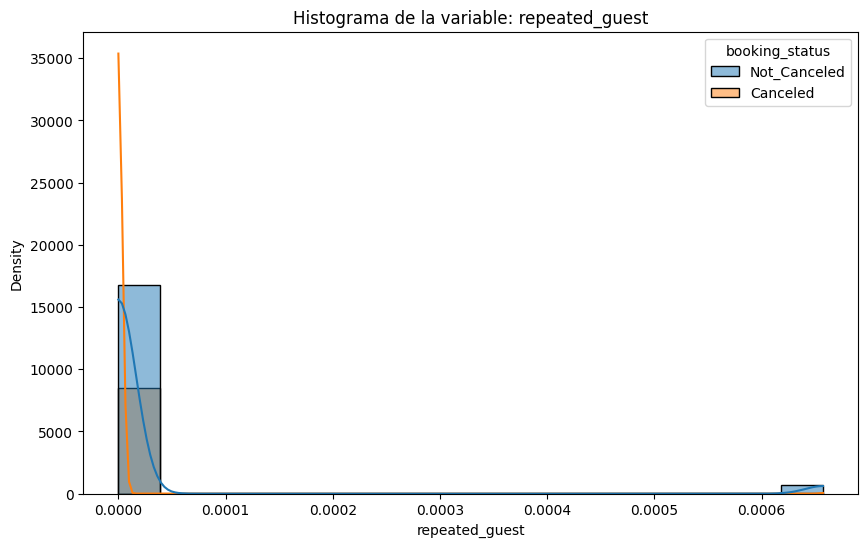

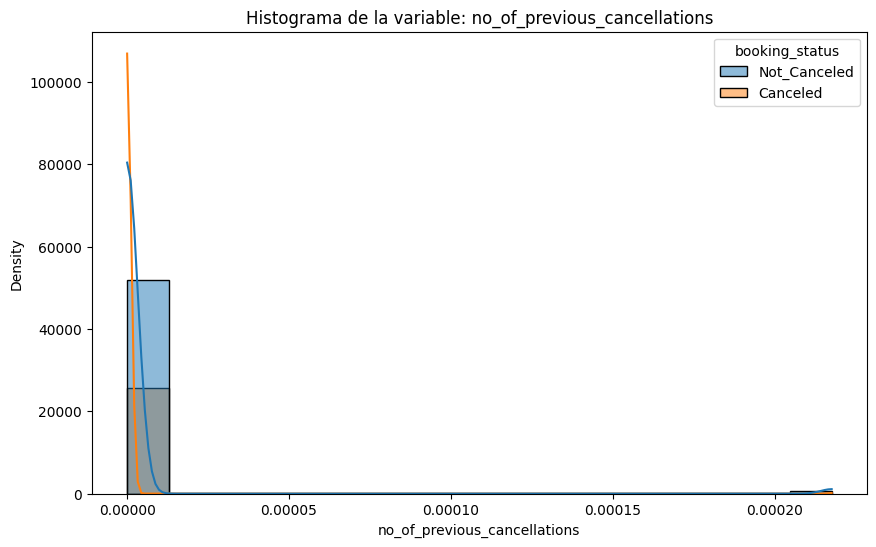

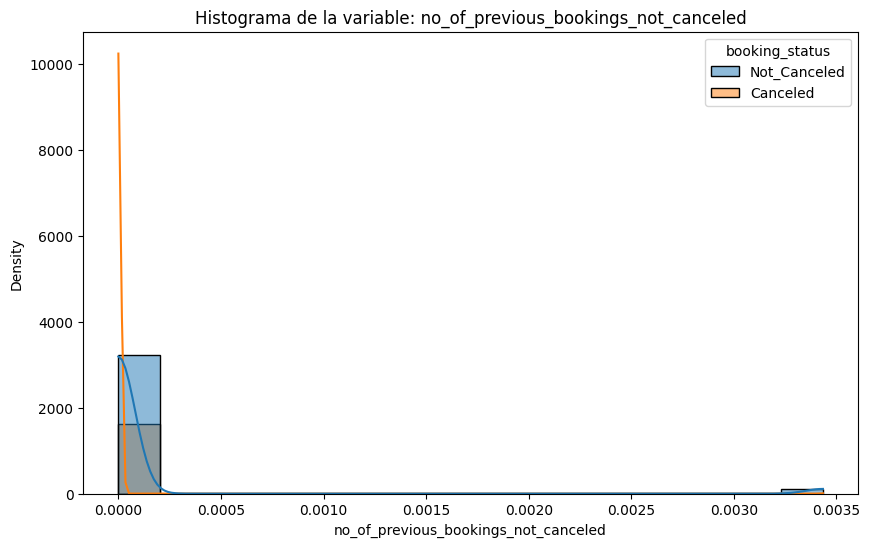

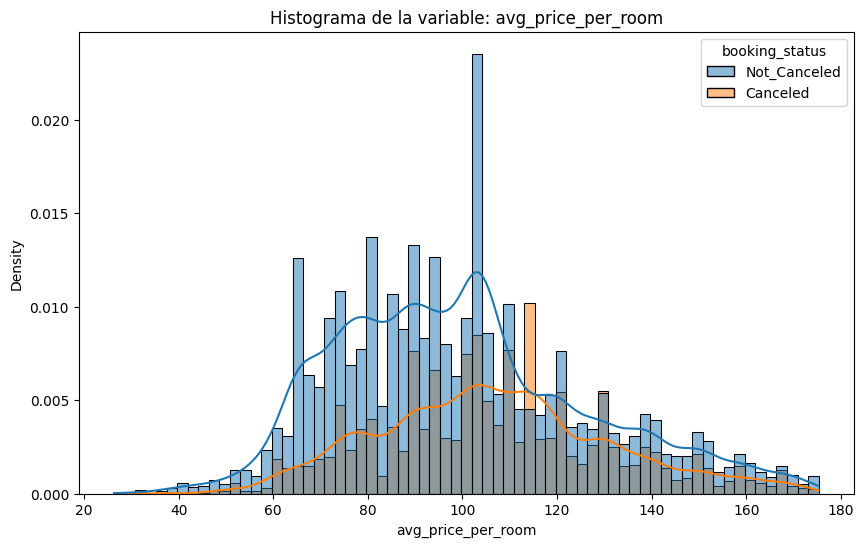

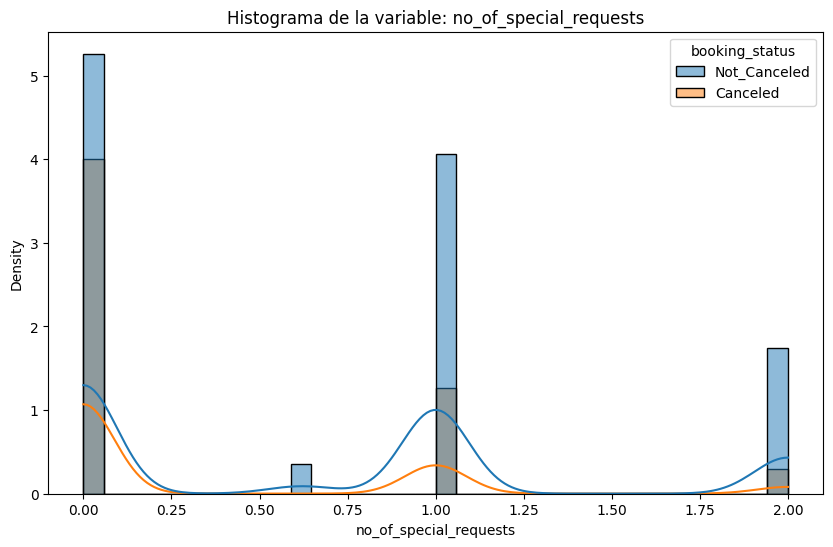

In [38]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, kde=True, hue="booking_status", stat="density", color="green")
    plt.title(f"Histograma de la variable: {column}")
    plt.show()

### Relaciones entre variables (Dispersión)

In [39]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [40]:
# Variables que queremos analizar frente a las cancelaciones
variables_to_compare = [
    ('lead_time', 'avg_price_per_room'),
    ('lead_time', 'no_of_special_requests'),
    ('avg_price_per_room', 'no_of_special_requests'),
    ('no_of_weekend_nights', 'no_of_week_nights')
]

# Variable objetivo
target = 'booking_status'


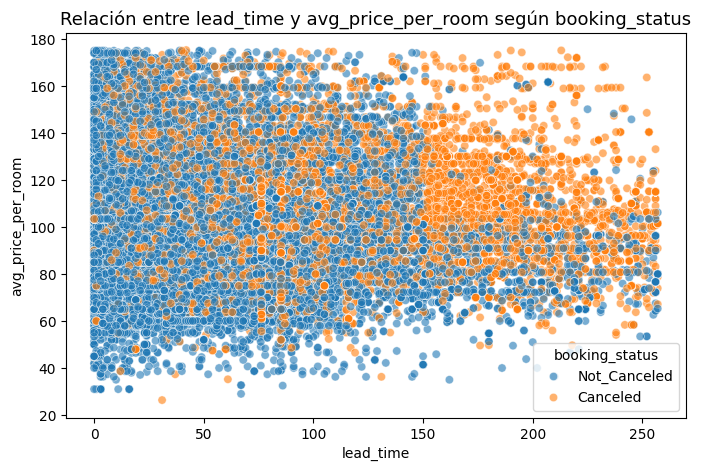

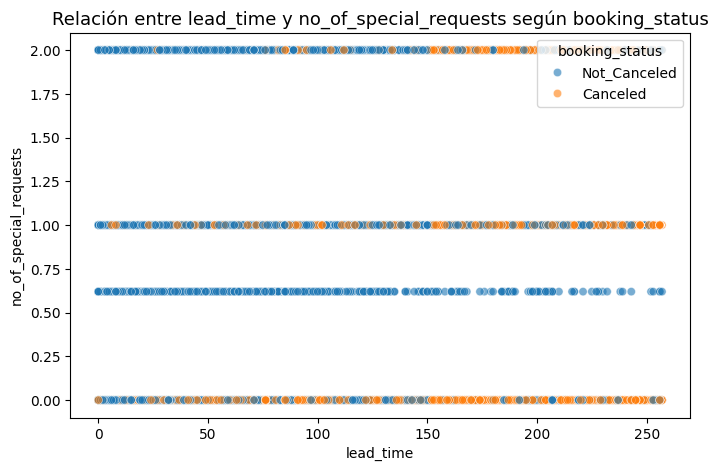

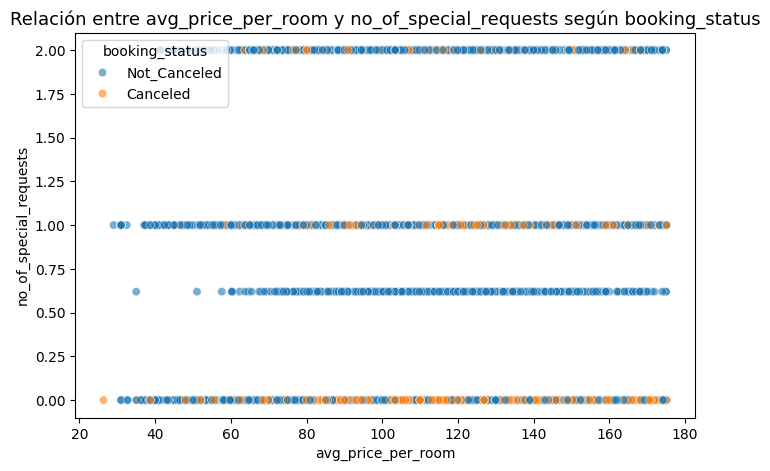

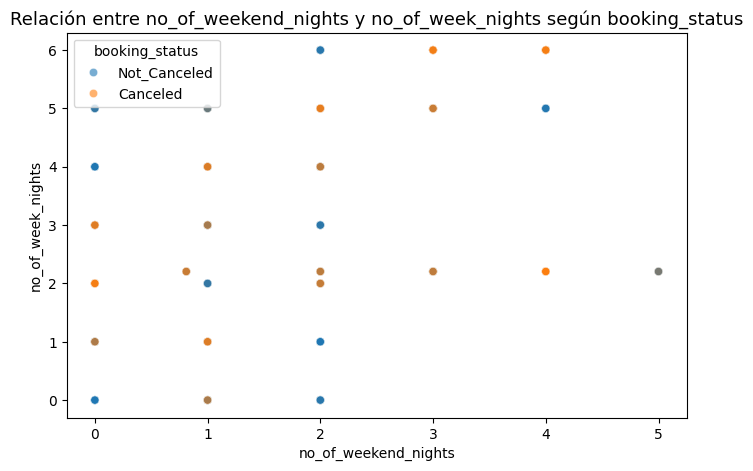

In [41]:
# Crear los scatterplots
for x_var, y_var in variables_to_compare:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_var, y=y_var, hue=target, alpha=0.6)
    plt.title(f"Relación entre {x_var} y {y_var} según {target}", fontsize=13)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=target)
    plt.show()

####  Matriz de correlación

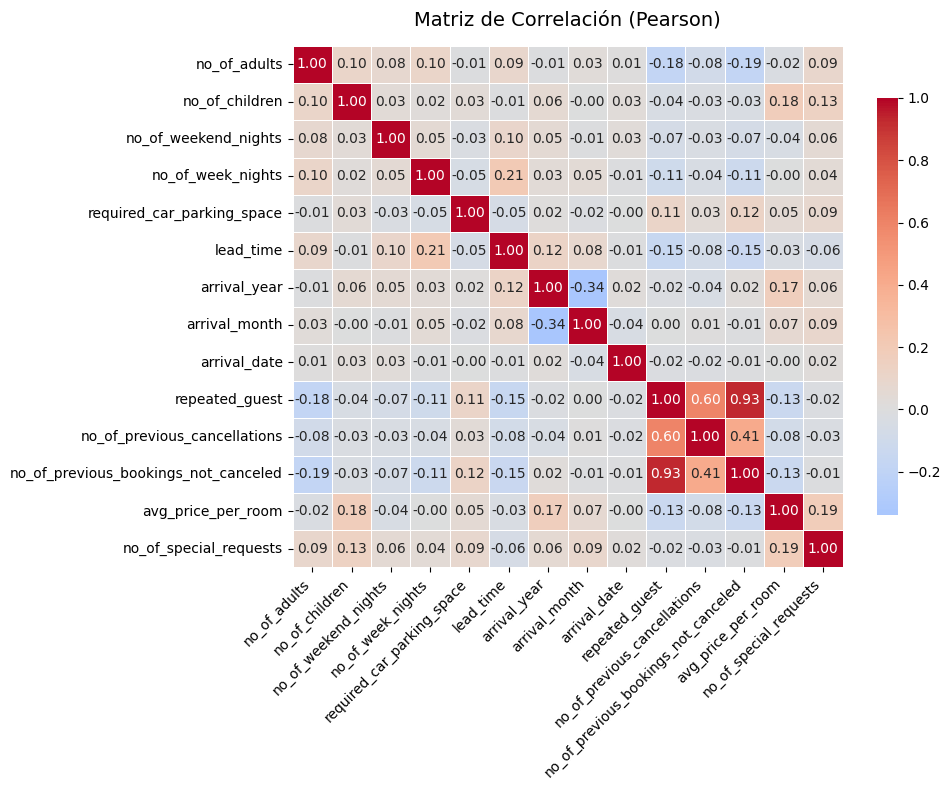

In [42]:
corr_matrix = df[numeric_columns].corr(method="pearson")
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    center=0,            
    linewidths=0.5,      
    cbar_kws={"shrink": .8}  
)

plt.title("Matriz de Correlación (Pearson)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribuciones estadísticas (normalidad)

In [43]:
from scipy import stats


In [44]:
#### Parámetros de la distribución normal
mu, sigma = 0, 0.5  # media y desviación estándar

In [45]:
#### Crear una distribución normal con esos parámetros
normal = stats.norm(mu, sigma)

In [46]:
#### Crear un rango de valores x dentro del percentil 1% al 99%
x = np.linspace(normal.ppf(0.01), normal.ppf(0.99), 100000)

In [47]:
# Calcular la densidad de probabilidad para cada valor de x
fp = normal.pdf(x)

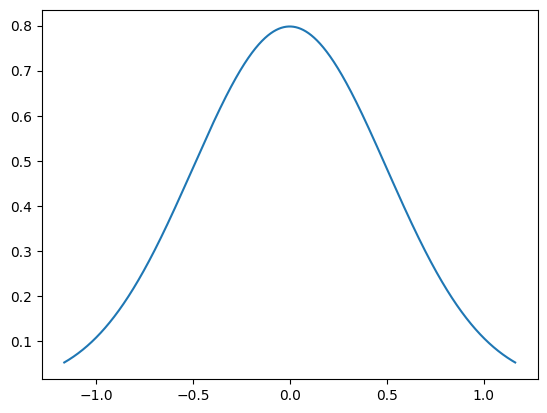

In [48]:
plt.plot(x,fp)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [50]:
# Crear una distribución uniforme estándar (entre 0 y 1)
uniforme = stats.uniform()

In [51]:
# Generar valores en el eje X desde el percentil 1% hasta el 99%
x = np.linspace(uniforme.ppf(0.01), uniforme.ppf(0.99), 1000)

In [52]:
# Calcular la función de densidad de probabilidad (PDF)
fp = uniforme.pdf(x)

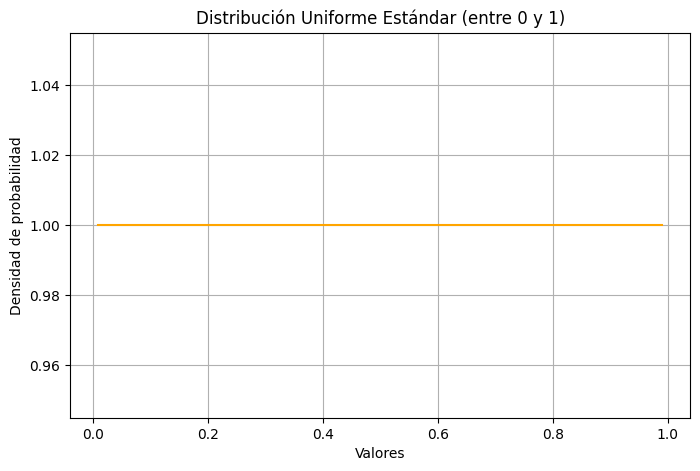

In [53]:
# Graficar la distribución
plt.figure(figsize=(8,5))
plt.plot(x, fp, color="orange")
plt.title("Distribución Uniforme Estándar (entre 0 y 1)")
plt.xlabel("Valores")
plt.ylabel("Densidad de probabilidad")
plt.grid(True)
plt.show()


Columnas numéricas detectadas: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


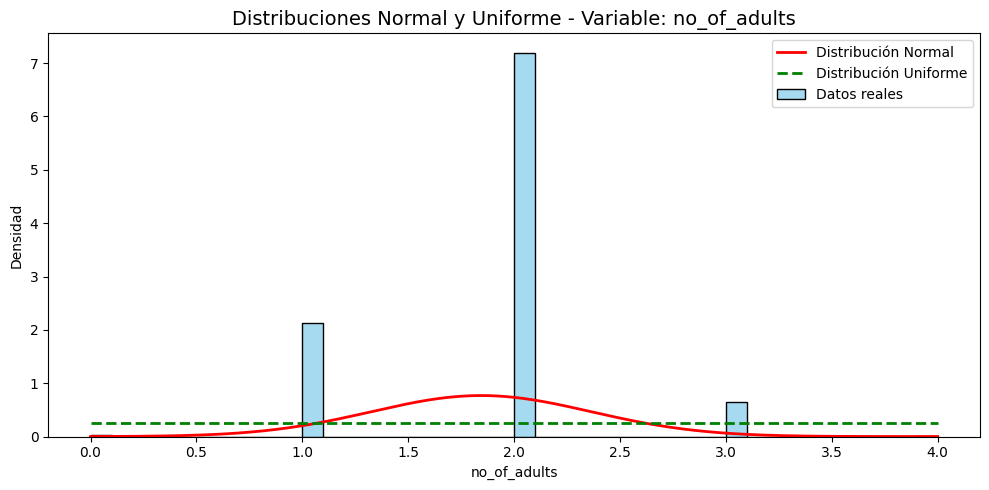

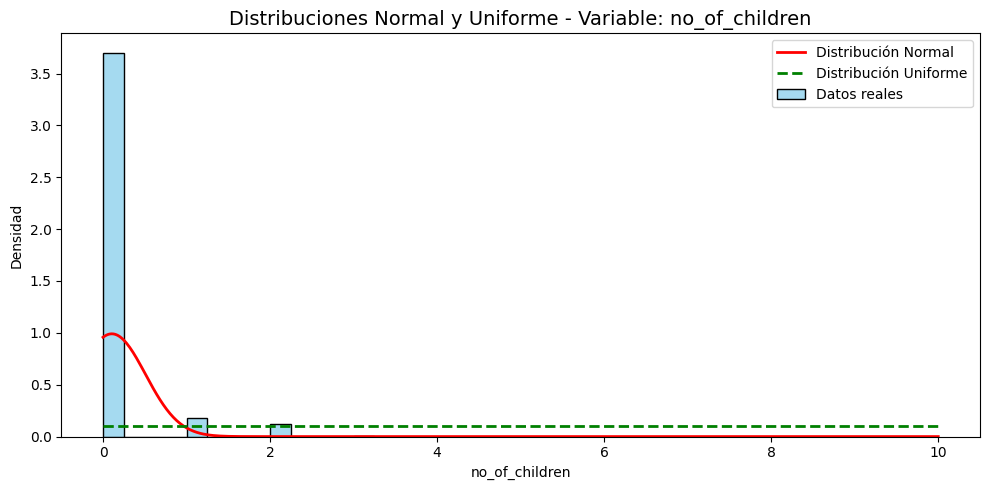

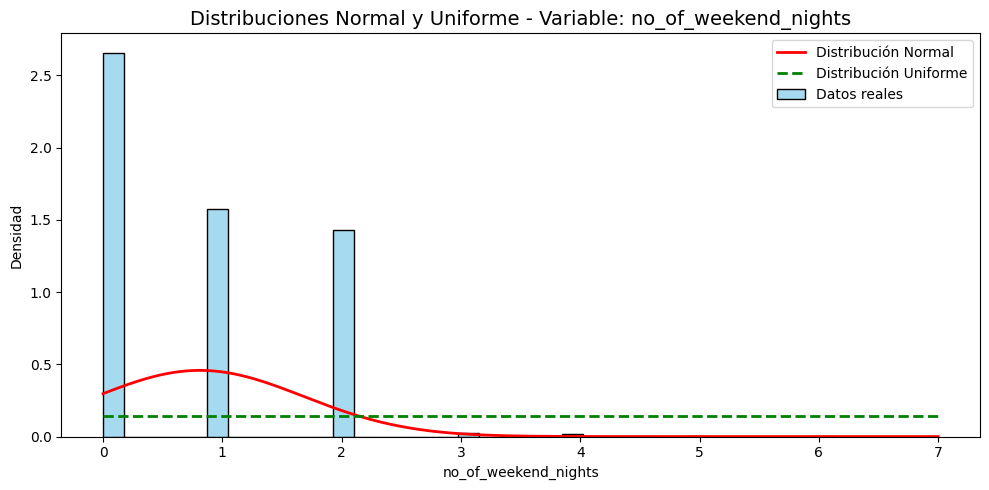

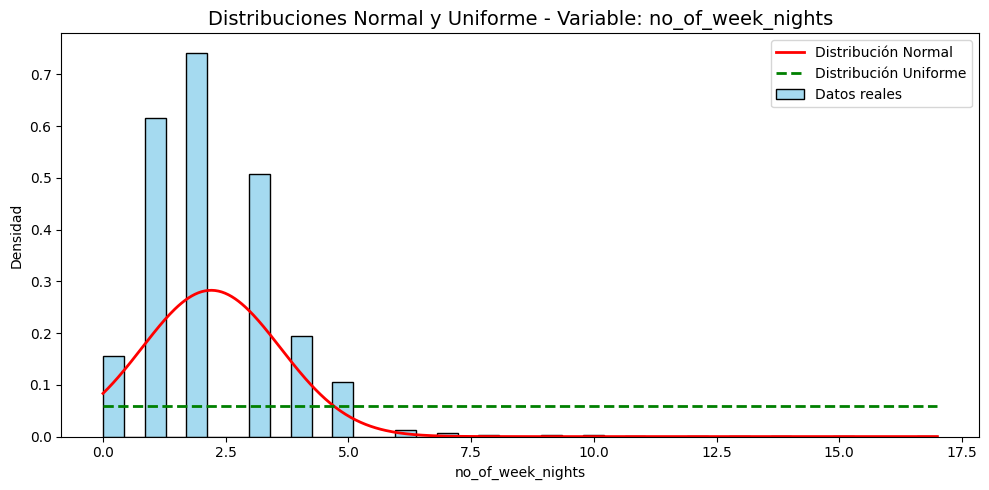

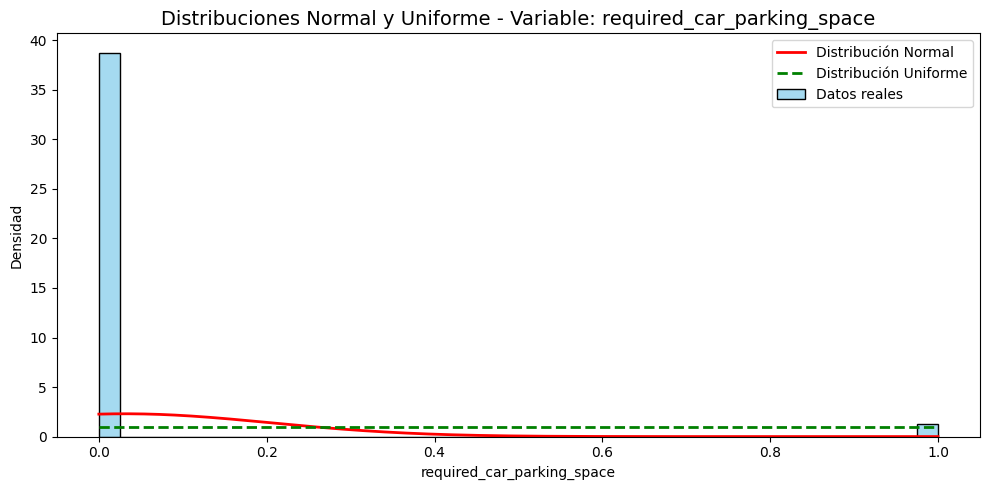

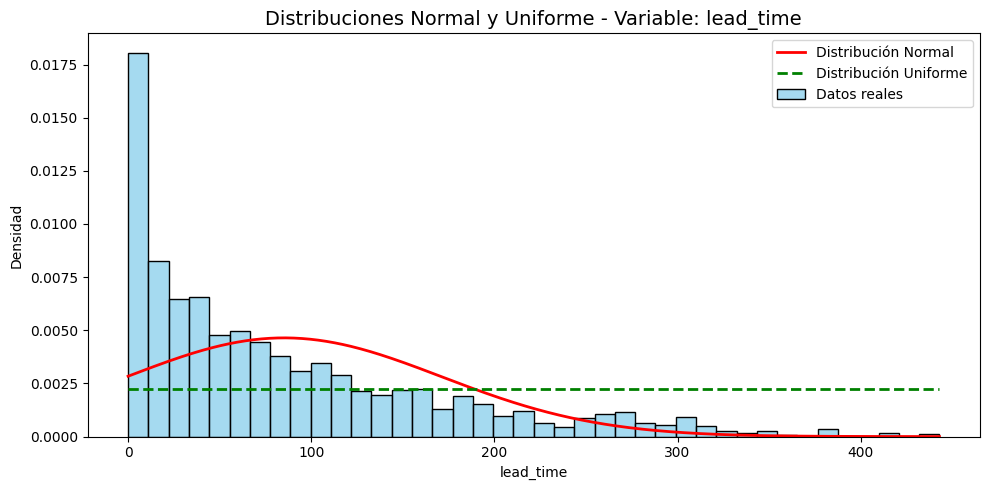

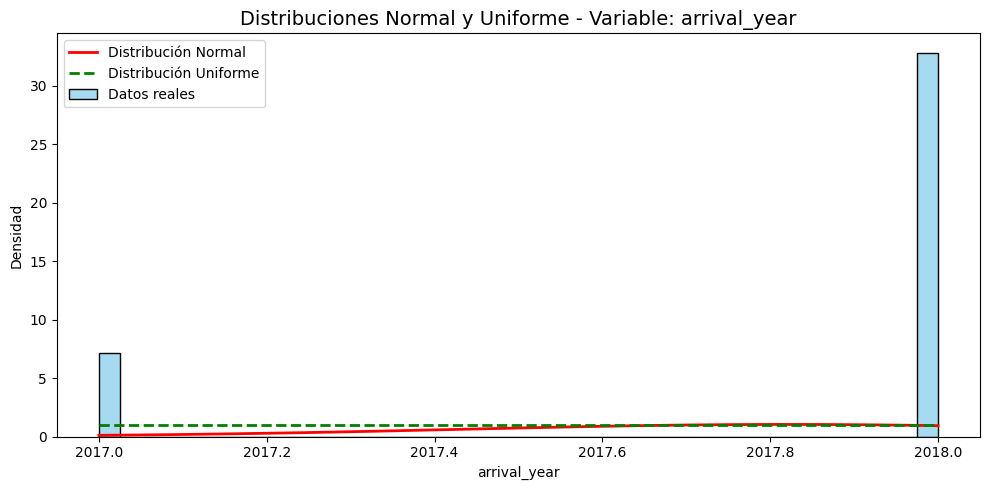

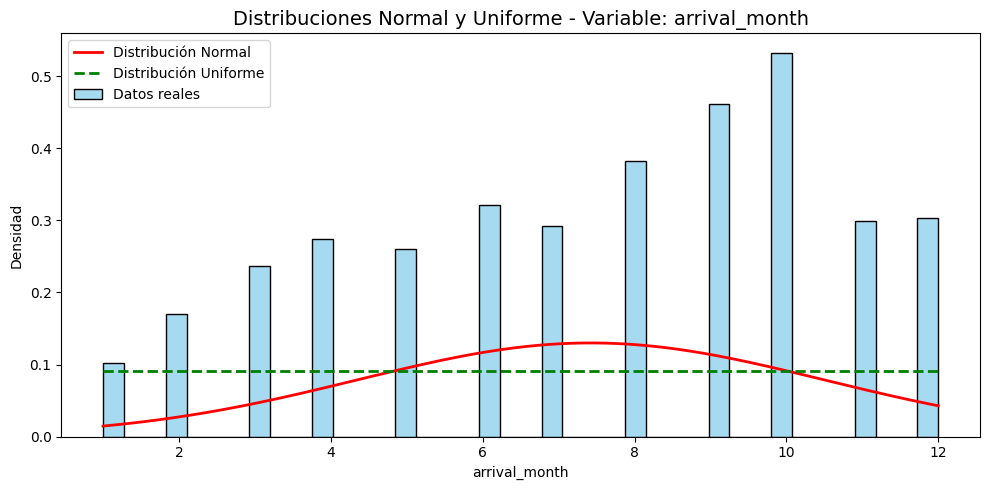

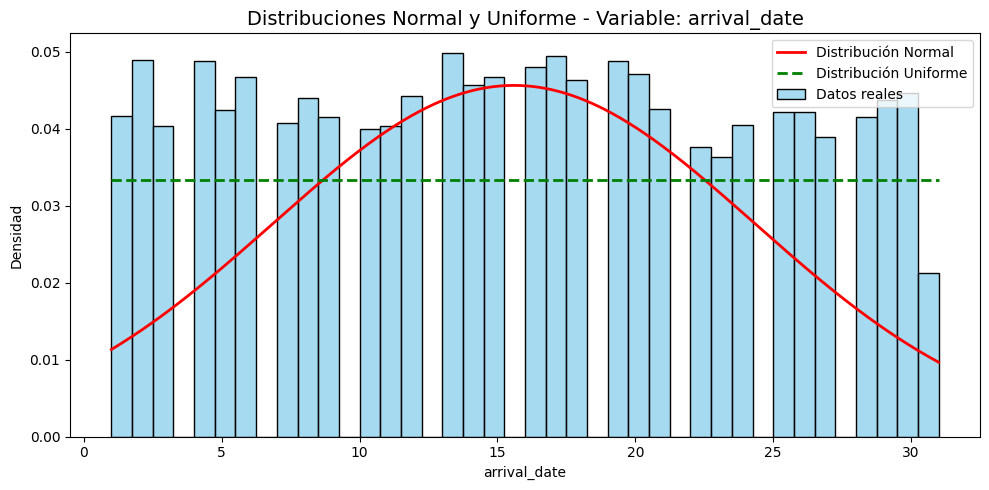

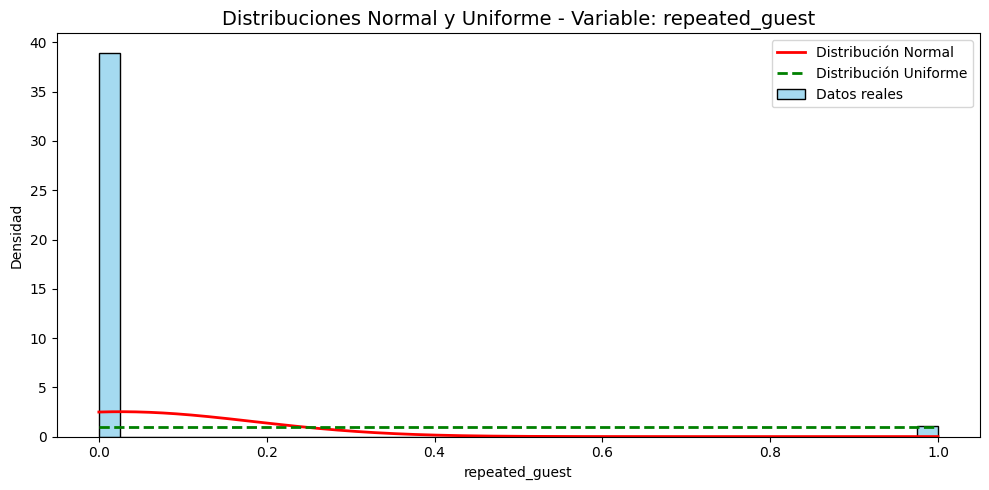

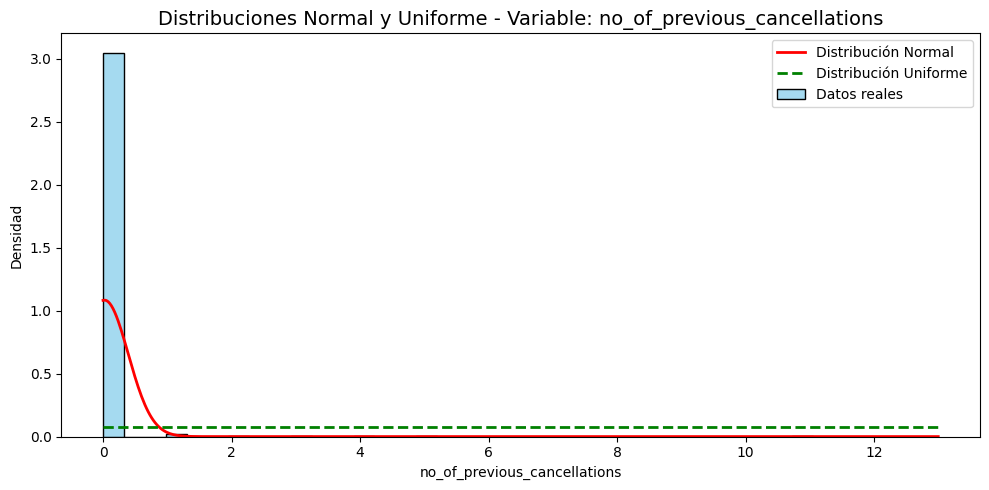

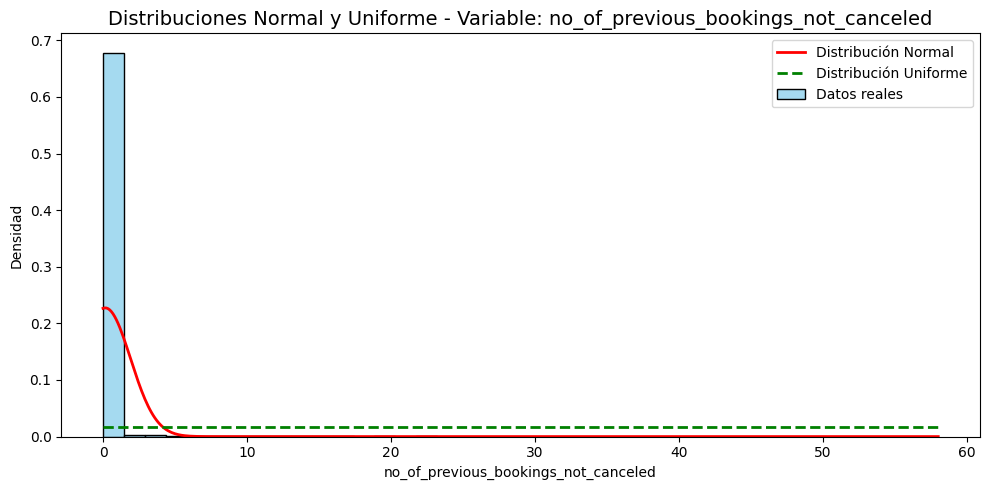

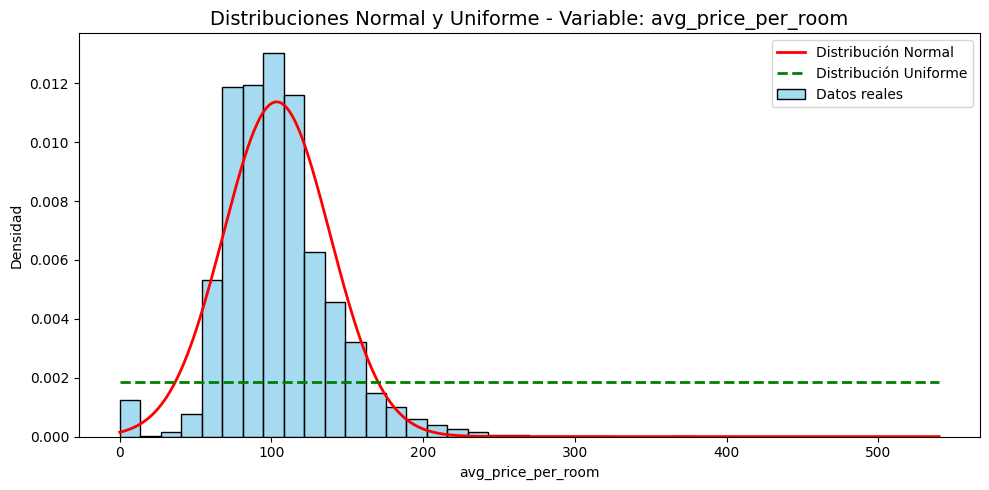

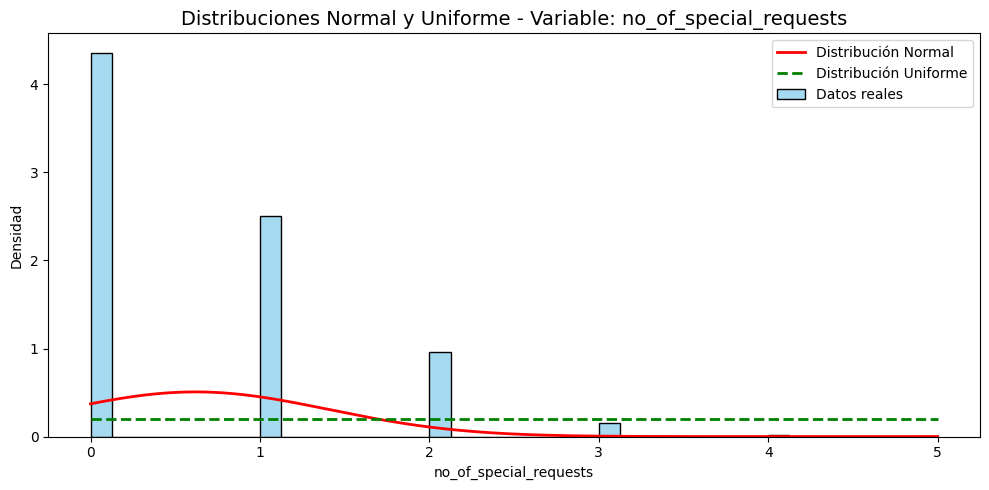

In [61]:
# ==========================================
# 📘 Importar librerías necesarias
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ==========================================
# 📊 Cargar dataset
# ==========================================
df = pd.read_csv("C:/Users/Luis Arbio/Documents/data/Processed/reservas_hoteles_processed.csv")

# ==========================================
# 🔍 Seleccionar columnas numéricas
# ==========================================
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Columnas numéricas detectadas:", numeric_columns.tolist())

# ==========================================
# ⚙️ Distribución Normal y Uniforme
# ==========================================
for column in numeric_columns:
    data = df[column].dropna()  # eliminar valores nulos

    # Calcular parámetros de la distribución normal (media y desviación estándar)
    mu = data.mean()
    sigma = data.std()

    # Crear rango de valores
    x = np.linspace(data.min(), data.max(), 500)

    # Distribuciones teóricas
    normal_pdf = stats.norm.pdf(x, mu, sigma)
    uniform_pdf = stats.uniform.pdf(x, loc=data.min(), scale=data.max() - data.min())

    # =========================
    # 🎨 Graficar comparaciones
    # =========================
    plt.figure(figsize=(10, 5))
    
    # Histograma real de los datos
    sns.histplot(data, bins=40, stat="density", color="skyblue", label="Datos reales", kde=False)
    
    # Curva Normal
    plt.plot(x, normal_pdf, color="red", linewidth=2, label="Distribución Normal")
    
    # Curva Uniforme
    plt.plot(x, uniform_pdf, color="green", linestyle="--", linewidth=2, label="Distribución Uniforme")

    # Títulos y etiquetas
    plt.title(f"Distribuciones Normal y Uniforme - Variable: {column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.legend()
    plt.tight_layout()
    plt.show()
